In [65]:
# Importing Python libraries for Exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
#Importing warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#For reading the data in google drive to google colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
#Reading the csv file from google drive for Exploratory data analysis
application_data=pd.read_csv('/content/drive/MyDrive/application_data.csv')
#To check top 5 rows of dataset
application_data.head()

SK_ID_CURR  TARGET  ... AMT_REQ_CREDIT_BUREAU_QRT AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1  ...                       0.0                        1.0
1      100003       0  ...                       0.0                        0.0
2      100004       0  ...                       0.0                        0.0
3      100006       0  ...                       NaN                        NaN
4      100007       0  ...                       0.0                        0.0

[5 rows x 122 columns]

In [5]:
#To display max. rows and columns
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [6]:
#For Knowing no.of Rows and columns present in dataset
application_data.shape

(307511, 122)

In [7]:
#For understanding the data types and Non-Null count of each column
application_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [8]:
#For checking null/missing values
application_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [9]:
#For finding percentage of null values in each column
null_values = (application_data.isnull().sum()/application_data.shape[0])*100
null_values.sort_values(ascending=False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
FLOORSMIN_MEDI                  67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MEDI                   59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**Explaination for Dropped columns**

* So total 49 columns were dropped from the dataset which doesnt effect the decision making process
* The following 48 columns(containing >40% Null values) were dropped which are not very critical columns for making decisions
COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,
NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MODE,FLOORSMIN_MEDI,FLOORSMIN_MODE,FLOORSMIN_AVG,
YEARS_BUILD_MEDI,YEARS_BUILD_MODE,YEARS_BUILD_AVG,
LANDAREA_MODE,LANDAREA_MEDI,LANDAREA_AVG,
BASEMENTAREA_MEDI,BASEMENTAREA_MODE,BASEMENTAREA_AVG,
NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,NONLIVINGAREA_AVG,
ELEVATORS_MODE,ELEVATORS_MEDI,ELEVATORS_AVG,
APARTMENTS_MODE,APARTMENTS_MEDI,APARTMENTS_AVG,
ENTRANCES_MEDI,ENTRANCES_MODE,ENTRANCES_AVG,
LIVINGAREA_MEDI,LIVINGAREA_MODE,LIVINGAREA_AVG,
FLOORSMAX_MODE,FLOORSMAX_MEDI,FLOORSMAX_AVG,
YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BEGINEXPLUATATION_AVG,
TOTALAREA_MODE,EMERGENCYSTATE_MODE,HOUSETYPE_MODE,
WALLSMATERIAL_MODE,OWN_CAR_AGE,FONDKAPREMONT_MODE
* The column EXT_SOURCE_1 could be critical for making an decision (since it contains 56% of null values), Hence dropping the column EXT_SOURCE_1

In [10]:
# We need to drop the columns which are having null values greater than 40%
app_data = application_data.loc[:,null_values<=40]

In [11]:
app_data.shape

(307511, 73)

In [12]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [13]:
#To investigate whether there is any correlation total documents provided and default
app_data.loc[:,"FLAG_DOCUMENT_2" : "FLAG_DOCUMENT_21"]
app_data["TOTAL_DOCUMENTS_PROVIDED"]=app_data.loc[:,"FLAG_DOCUMENT_2" : "FLAG_DOCUMENT_21"].sum(axis=1)
app_data[["TARGET","TOTAL_DOCUMENTS_PROVIDED"]]

TARGET  TOTAL_DOCUMENTS_PROVIDED
0            1                         1
1            0                         1
2            0                         0
3            0                         1
4            0                         1
...        ...                       ...
307506       0                         1
307507       0                         1
307508       0                         1
307509       1                         1
307510       0                         1

[307511 rows x 2 columns]

In [14]:
app_data["TOTAL_DOCUMENTS_PROVIDED"].describe()

count    307511.000000
mean          0.930155
std           0.344295
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: TOTAL_DOCUMENTS_PROVIDED, dtype: float64

From above, it can be concluded that TOTAL_DOCUMENTS_PROVIDED column and FLAG_DOCUMENT columns are insignificant and therefore dropping these columns

In [15]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [16]:
app_data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','TOTAL_DOCUMENTS_PROVIDED'],axis=1,inplace=True)

In [17]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [18]:
(app_data.isnull().sum()/app_data.shape[0])*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

There are still more missing values in columns like
*   OCCUPATION_TYPE
*   EXT_SOURCE_3
*   AMT_REQ_CREDIT_BUREAU_HOUR
*   AMT_REQ_CREDIT_BUREAU_DAY
*   AMT_REQ_CREDIT_BUREAU_WEEK
*   AMT_REQ_CREDIT_BUREAU_MON
*   AMT_REQ_CREDIT_BUREAU_QRT
*   AMT_REQ_CREDIT_BUREAU_YEAR

So we need to check the significance of these columns


In [19]:
#Firstly verifying the significance of OCCUPATION_TYPE COLUMN (it could be driving factor in making decisions)
app_data["OCCUPATION_TYPE"]
#creating "Others" category in place of null values
app_data.OCCUPATION_TYPE.replace(np.NaN,"Others",inplace=True)
#Finding the count of each OCCUPATION_TYPE(Excluding Others)
app_data[app_data["OCCUPATION_TYPE"]!="Others"]["OCCUPATION_TYPE"].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

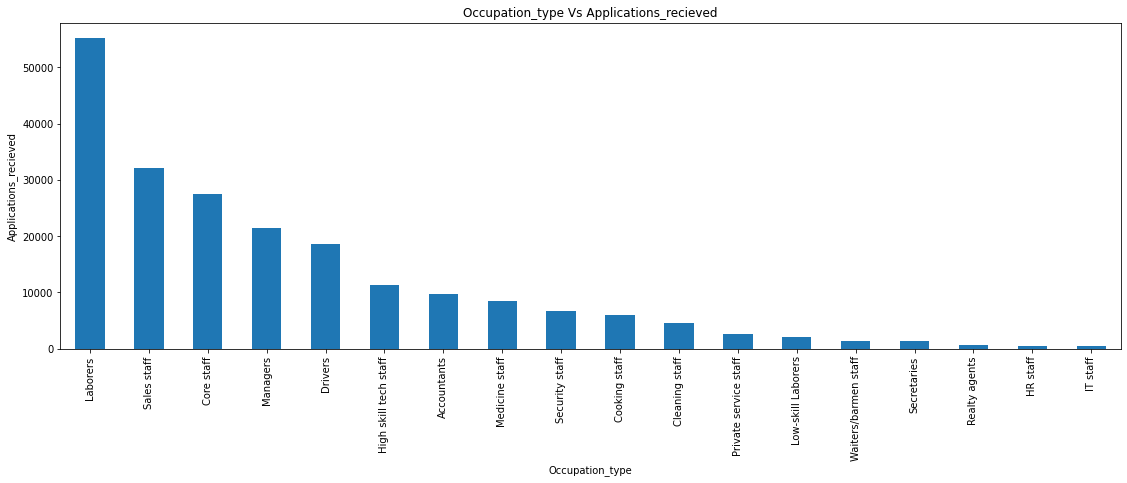

In [20]:
#Finding relation between Occupation_type(Excluding Others) and Applications_recieved
plt.figure(figsize=[19,6])
plt.title("Occupation_type Vs Applications_recieved")
plt.xlabel("Occupation_type")
plt.ylabel("Applications_recieved")
app_data[app_data["OCCUPATION_TYPE"]!="Others"]["OCCUPATION_TYPE"].value_counts().plot.bar()
plt.show()

In [21]:
#Imputing the below numeric columns with their median values
#AMT_REQ_CREDIT_BUREAU_HOUR
app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].median(), inplace=True)
#AMT_REQ_CREDIT_BUREAU_DAY
app_data["AMT_REQ_CREDIT_BUREAU_DAY"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_DAY"].median(), inplace=True)
#AMT_REQ_CREDIT_BUREAU_WEEK
app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].median(), inplace=True)
#AMT_REQ_CREDIT_BUREAU_MON
app_data["AMT_REQ_CREDIT_BUREAU_MON"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_MON"].median(), inplace=True)
#AMT_REQ_CREDIT_BUREAU_QRT
app_data["AMT_REQ_CREDIT_BUREAU_QRT"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_QRT"].median(), inplace=True)
#AMT_REQ_CREDIT_BUREAU_YEAR
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].replace(np.NaN, app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].median(), inplace=True)

EXT_SOURCE_3 can also be an significant column while making decisions hence not dropping the column

In [22]:
# DAYS_BIRTH , DAYS_EMPLOYED, DAYS_REGISTRATION , DAYS_ID_PUBLISH and DAYS_LAST_PHONE_CHANGE contains negative values. 
# The computation might be done like (past date - current date) , Therefore converting all these value to positive
app_data["DAYS_BIRTH"]=app_data["DAYS_BIRTH"].abs()
app_data["DAYS_EMPLOYED"]=app_data["DAYS_EMPLOYED"].abs()
app_data["DAYS_REGISTRATION"]=app_data["DAYS_REGISTRATION"].abs()
app_data["DAYS_ID_PUBLISH"]=app_data["DAYS_ID_PUBLISH"].abs()
app_data["DAYS_LAST_PHONE_CHANGE"]=app_data["DAYS_LAST_PHONE_CHANGE"].abs()

In [23]:
#Checking DAYS_EMPLOYED column
app_data["DAYS_EMPLOYED"].apply(lambda x: x/365).value_counts()

1000.665753    55374
0.547945         156
0.613699         152
0.630137         151
0.545205         151
               ...  
27.465753          1
38.758904          1
32.326027          1
32.400000          1
30.619178          1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64

Almost 55374 rows has 1000 years of employement which is not possible hence imputing these values with median

In [24]:
app_data["DAYS_EMPLOYED"].median()
app_data["DAYS_EMPLOYED"].replace(365243, app_data["DAYS_EMPLOYED"].median(),inplace=True)

In [25]:
additional_data_nullvalues=100*(app_data.isnull().sum()/app_data.shape[0])
additional_data_nullvalues[(additional_data_nullvalues>0)&(additional_data_nullvalues<5)]

AMT_ANNUITY                 0.003902
AMT_GOODS_PRICE             0.090403
NAME_TYPE_SUITE             0.420148
CNT_FAM_MEMBERS             0.000650
EXT_SOURCE_2                0.214626
OBS_30_CNT_SOCIAL_CIRCLE    0.332021
DEF_30_CNT_SOCIAL_CIRCLE    0.332021
OBS_60_CNT_SOCIAL_CIRCLE    0.332021
DEF_60_CNT_SOCIAL_CIRCLE    0.332021
DAYS_LAST_PHONE_CHANGE      0.000325
dtype: float64

In [26]:
#Dropping the above null value rows 
app_data.dropna(subset=["AMT_ANNUITY","AMT_GOODS_PRICE","NAME_TYPE_SUITE","CNT_FAM_MEMBERS","EXT_SOURCE_2",
                        "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE",
                        "DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE"],inplace=True)
app_data.shape

(304531, 53)

In [27]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  304531.000000  304531.000000  304531.000000      3.045310e+05   
mean   278171.558800       0.081000       0.417140      1.686634e+05   
std    102782.532925       0.272836       0.722308      2.378910e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189138.500000       0.000000       0.000000      1.125000e+05   
50%    278193.000000       0.000000       0.000000      1.476000e+05   
75%    367136.000000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.045310e+05  304531.000000     3.045310e+05   
mean   5.995592e+05   27146.369655     5.384949e+05   
std    4.021453e+05   14480.104699     3.690524e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16573.500000     2.385000e+05   
50%    5.172660e+05   24939.000000     4.500000e+05   
75%    8.086500e+05   34641.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               304531.000000  304531.000000  304531.000000   
mean                     0.020842   16040.509915    2355.873730   
std                      0.013808    4361.978717    2119.233523   
min                      0.000290    7489.000000       0.000000   
25%                      0.010006   12418.000000     934.000000   
50%                      0.018850   15755.000000    2219.000000   
75%                      0.028663   19682.000000    2762.000000   
max                      0.072508   25229.000000   17912.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  \
count      304531.000000    304531.000000    304531.0   304531.000000   
mean         4986.687785      2994.732070         1.0        0.819841   
std          3521.601095      1509.373915         0.0        0.384320   
min             0.000000         0.000000         1.0        0.000000   
25%          2012.000000      1721.000000         1.0        1.000000   
50%          4505.000000      3255.000000         1.0        1.000000   
75%          7478.000000      4299.000000         1.0        1.000000   
max         24672.000000      7197.000000         1.0        1.000000   

       FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  \
count    304531.000000     304531.000000  304531.000000  304531.000000   
mean          0.199730          0.998141       0.281278       0.056881   
std           0.399798          0.043071       0.449624       0.231615   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          1.000000       0.000000       0.000000   
50%           0.000000          1.000000       0.000000       0.000000   
75%           0.000000          1.000000       1.000000       0.000000   
max           1.000000          1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    304531.000000         304531.000000                304531.000000   
mean          2.153163              2.053328                     2.032302   
std           0.910638              0.508890                     0.502616   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            304531.000000               304531.000000   
mean                 12.060079                    0.015154   
std                   3.265884                    0.1221

In [29]:
#removing the columns which are not helpful for decision making
not_useful=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','FLAG_OWN_CAR','CNT_CHILDREN','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE']

app_data.drop(labels=not_useful,axis=1,inplace=True)

In [30]:
app_data.shape

(304531, 41)

In [31]:
#Categorical columns having 'XNA' values
print(app_data[app_data['CODE_GENDER']=='XNA'].shape)
print(app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape)

(4, 41)
(54852, 41)


In [32]:
# By Gender column we can check the number of males and females
app_data['CODE_GENDER'].value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

In [33]:
# We can Update the column 'CODE_GENDER' with "F" for the dataset
app_data.loc[app_data['CODE_GENDER']=='XNA','CODE_GENDER']='F'
app_data['CODE_GENDER'].value_counts()

F    200486
M    104045
Name: CODE_GENDER, dtype: int64

In [34]:
# organization type column
app_data['ORGANIZATION_TYPE'].describe()

count                     304531
unique                        58
top       Business Entity Type 3
freq                       67270
Name: ORGANIZATION_TYPE, dtype: object

In [35]:
#55374 rows are having 'XNA' values. so if we drop the 55374 rows it will not have major impact on dataset
app_data=app_data.drop(app_data.loc[app_data['ORGANIZATION_TYPE']=='XNA'].index)
app_data[app_data['ORGANIZATION_TYPE']=='XNA'].shape

(0, 41)

In [36]:
app_data.describe()

SK_ID_CURR         TARGET  AMT_INCOME_TOTAL    AMT_CREDIT  \
count  249679.000000  249679.000000      2.496790e+05  2.496790e+05   
mean   278096.851357       0.086912      1.757963e+05  6.118524e+05   
std    102811.424604       0.281706      2.597503e+05  4.060416e+05   
min    100002.000000       0.000000      2.565000e+04  4.500000e+04   
25%    189013.500000       0.000000      1.125000e+05  2.784600e+05   
50%    278050.000000       0.000000      1.575000e+05  5.212800e+05   
75%    367164.500000       0.000000      2.115000e+05  8.302140e+05   
max    456255.000000       1.000000      1.170000e+08  4.050000e+06   

         AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  \
count  249679.000000     2.496790e+05               249679.000000   
mean    27852.590576     5.494024e+05                    0.020870   
std     14634.036694     3.727593e+05                    0.013852   
min      1980.000000     4.050000e+04                    0.000290   
25%     17113.500000     2.475000e+05                    0.010006   
50%     25920.000000     4.500000e+05                    0.018850   
75%     35640.000000     6.930000e+05                    0.028663   
max    258025.500000     4.050000e+06                    0.072508   

          DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
count  249679.000000  249679.000000      249679.000000    249679.000000   
mean    14772.880655    2385.943531        4636.306906      2801.180608   
std      3661.000918    2339.400772        3251.221099      1515.255748   
min      7489.000000       0.000000           0.000000         0.000000   
25%     11781.000000     768.000000        1847.000000      1488.000000   
50%     14578.000000    1649.000000        4267.000000      2887.000000   
75%     17566.000000    3177.000000        6952.000000      4177.000000   
max     25200.000000   17912.000000       22928.000000      7197.000000   

       HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
count            249679.000000               249679.000000   
mean                 12.199580                    0.017262   
std                   3.299959                    0.130247   
min                   0.000000                    0.000000   
25%                  10.000000                    0.000000   
50%                  12.000000                    0.000000   
75%                  15.000000                    0.000000   
max                  23.000000                    1.000000   

       REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
count               249679.000000                249679.000000   
mean                     0.061807                     0.049419   
std                      0.240806                     0.216743   
min                      0.000000                     0.000000   
25%                      0.000000                     0.000000   
50%                      0.000000                     0.000000   
75%                      0.000000                     0.000000   
max                      1.000000                     1.000000   

       REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  \
count           249679.000000           249679.000000   
mean                 0.089827                0.281297   
std                  0.285935                0.449633   
min                  0.000000                0.000000   
25%                  0.000000                0.000000   
50%                  0.000000                0.000000   
75%                  0.000000                1.000000   
max                  1.000000                1.000000   

       LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count            249679.000000  2.496790e+05  200371.000000   
mean                  0.219189  5.159873e-01       0.500235   
std                   0.413698  1.899887e-01       0.196014   
min                   0.000000  8.173617e-08       0.000527   
25%                   0.000000  3.980135e-01       0.357293   
50%                   0.00

In [37]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 249679 entries, 0 to 307510
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   249679 non-null  int64  
 1   TARGET                       249679 non-null  int64  
 2   NAME_CONTRACT_TYPE           249679 non-null  object 
 3   CODE_GENDER                  249679 non-null  object 
 4   FLAG_OWN_REALTY              249679 non-null  object 
 5   AMT_INCOME_TOTAL             249679 non-null  float64
 6   AMT_CREDIT                   249679 non-null  float64
 7   AMT_ANNUITY                  249679 non-null  float64
 8   AMT_GOODS_PRICE              249679 non-null  float64
 9   NAME_TYPE_SUITE              249679 non-null  object 
 10  NAME_INCOME_TYPE             249679 non-null  object 
 11  NAME_EDUCATION_TYPE          249679 non-null  object 
 12  NAME_FAMILY_STATUS           249679 non-null  object 
 13 

# **Handling the outliers**
**Categorical variables**
*   TARGET
*   NAME_CONTRACT_TYPE
*   NAME_EDUCATION_TYPE
*   NAME_FAMILY_STATUS
*   NAME_HOUSING_TYPE
*   ORGANIZATION_TYPE
*   CODE_GENDER

In [38]:
# 'TARGET' column
count =app_data['TARGET'].value_counts(dropna=False)
percentage = app_data['TARGET'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
0  227979  91.31
1   21700   8.69

# Observations
* Target variable data is good. (1 - Client experiencing payment troubles: he or she was late on at least one of the first Y instalments of the loan in our sample for more than X days, 0 - all other situations (assuming no difficulties))
* The data values range from 1 to 0.
* Non-difficulties account for 92 percent of data.

In [40]:
# NAME_CONTRACT_TYPE column
count = app_data['NAME_CONTRACT_TYPE'].value_counts(dropna=False)
percentage = app_data['NAME_CONTRACT_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
Cash loans       224927  90.09
Revolving loans   24752   9.91

# Observations
* The column appears to be well-organized and evenly balanced among case loans and revolving loans.
*   Cash loans accounts to 90% data

In [41]:
# NAME_EDUCATION_TYPE column
count = app_data['NAME_EDUCATION_TYPE'].value_counts(dropna=False)
percentage = app_data['NAME_EDUCATION_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
Secondary / secondary special  171852  68.83
Higher education                65757  26.34
Incomplete higher                9661   3.87
Lower secondary                  2272   0.91
Academic degree                   137   0.05

# Observations
* Secondary / secondary special	type accounts to 71% of applications


In [42]:
# NAME_FAMILY_STATUS column
count = app_data['NAME_FAMILY_STATUS'].value_counts(dropna=False)
percentage = app_data['NAME_FAMILY_STATUS'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
Married               162419  65.05
Single / not married   38828  15.55
Civil marriage         25933  10.39
Separated              15851   6.35
Widow                   6648   2.66

# Observations
* Married applicant population is around 64%



In [43]:
# NAME_HOUSING_TYPE column
count = app_data['NAME_HOUSING_TYPE'].value_counts(dropna=False)
percentage = app_data['NAME_HOUSING_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
House / apartment    218340  87.45
With parents          14474   5.80
Municipal apartment    8972   3.59
Rented apartment       4627   1.85
Office apartment       2276   0.91
Co-op apartment         990   0.40

In [44]:
# ORGANIZATION_TYPE column
count = app_data['ORGANIZATION_TYPE'].value_counts(dropna=False)
percentage = app_data['ORGANIZATION_TYPE'].value_counts(dropna=False, normalize=True)
pd.concat([count,round(percentage*100,2)], axis=1, keys=['counts', '%'])

counts      %
Business Entity Type 3   67270  26.94
Self-employed            38048  15.24
Other                    16546   6.63
Medicine                 11078   4.44
Business Entity Type 2   10458   4.19
Government               10308   4.13
School                    8823   3.53
Trade: type 7             7769   3.11
Kindergarten              6823   2.73
Construction              6659   2.67
Business Entity Type 1    5919   2.37
Transport: type 4         5353   2.14
Trade: type 3             3443   1.38
Industry: type 9          3328   1.33
Industry: type 3          3254   1.30
Security                  3215   1.29
Housing                   2935   1.18
Industry: type 11         2685   1.08
Military                  2610   1.05
Bank                      2455   0.98
Agriculture               2436   0.98
Police                    2319   0.93
Transport: type 2         2184   0.87
Postal                    2137   0.86
Security Ministries       1953   0.78
Trade: type 2             1871   0.75
Restaurant                1794   0.72
Services                  1561   0.63
University                1311   0.53
Industry: type 7          1295   0.52
Transport: type 3         1174   0.47
Industry: type 1          1034   0.41
Hotel                      959   0.38
Electricity                940   0.38
Industry: type 4           873   0.35
Trade: type 6              626   0.25
Insurance                  591   0.24
Industry: type 5           590   0.24
Telecom                    568   0.23
Emergency                  552   0.22
Industry: type 2           457   0.18
Advertising                428   0.17
Realtor                    388   0.16
Culture                    373   0.15
Industry: type 12          368   0.15
Trade: type 1              340   0.14
Mobile                     314   0.13
Legal Services             303   0.12
Cleaning                   254   0.10
Transport: type 1          200   0.08
Industry: type 6           112   0.04
Industry: type 10          109   0.04
Religion                    85   0.03
Industry: type 13           65   0.03
Trade: type 4               64   0.03
Trade: type 5               48   0.02
Industry: type 8            24   0.01

**Continous variables**
* AGE
* YEARS_EMPLOYED
* AMT_GOODS_PRICE
* AMT_ANNUITY
* AMT_CREDIT
* AMT_INCOME_TOTAL

In [53]:
# To get numerical columns from the application data
num_col_app_data=app_data.select_dtypes(include=np.number)

In [54]:
#since there are large number of numerical columns, plotting histograms for columns containing more than 100 unique values.
lar_num =num_col_app_data.loc[:, num_col_app_data.apply(lambda x: x.nunique())>100].columns.tolist() 
lar_num

['SK_ID_CURR',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3']

In [66]:
# functions for plotting box plot
# Since we have more columns creating a function to ease the plot
def udf_plot_box_univariate(*args,data_df):                        
   
    m=math.ceil(len(args)/2)  # determining the length of arguments for estimating the shape of subplots                   
    
    fig,axes = plt.subplots(m,2, figsize = (12, 6*m))
    ax_li =[item for sublist in axes for item in sublist]  # Identifying axis positions
    
    for col in args:
        ax_info = ax_li.pop() # In each iteration selecting the axis (or) location of subplot
        sns.boxplot(y=data_df[col],ax=ax_info)  # Creating the box plot on basis of selected column values
        ax_info.set_title(col) # Fixing the Title based on the column name
       
        ax_info.set(xlabel='') # By making the title fixed i have removed x-axis lable
        plt.tight_layout()
        ax_info.set_yscale('log') # Fixing the logarithemic scale for the plt

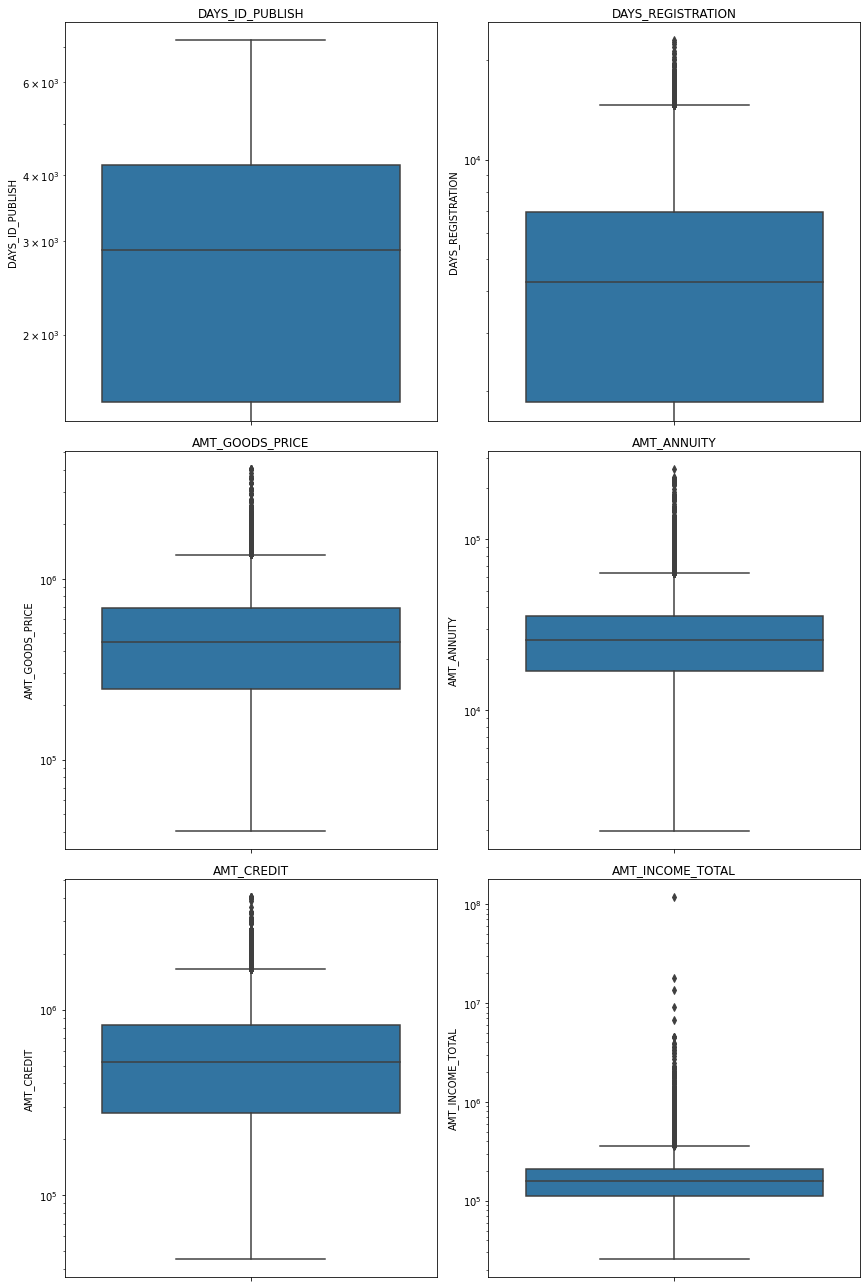

In [67]:
# Checking for outliers by selecting specific columns
quant_uni_list = lar_num[1:5]+lar_num[7:9]
# Plotting the selected columns
udf_plot_box_univariate(*quant_uni_list,data_df=app_data)

In [68]:
# Handling outliers from the columns

q = app_data['AMT_INCOME_TOTAL'].quantile(0.93)
app_data=app_data[app_data['AMT_INCOME_TOTAL'] <=q]

q = app_data['AMT_CREDIT'].quantile(0.97)
app_data=app_data[app_data['AMT_CREDIT'] <=q]

q = app_data['AMT_ANNUITY'].quantile(0.97)
app_data=app_data[app_data['AMT_ANNUITY'] <=q]

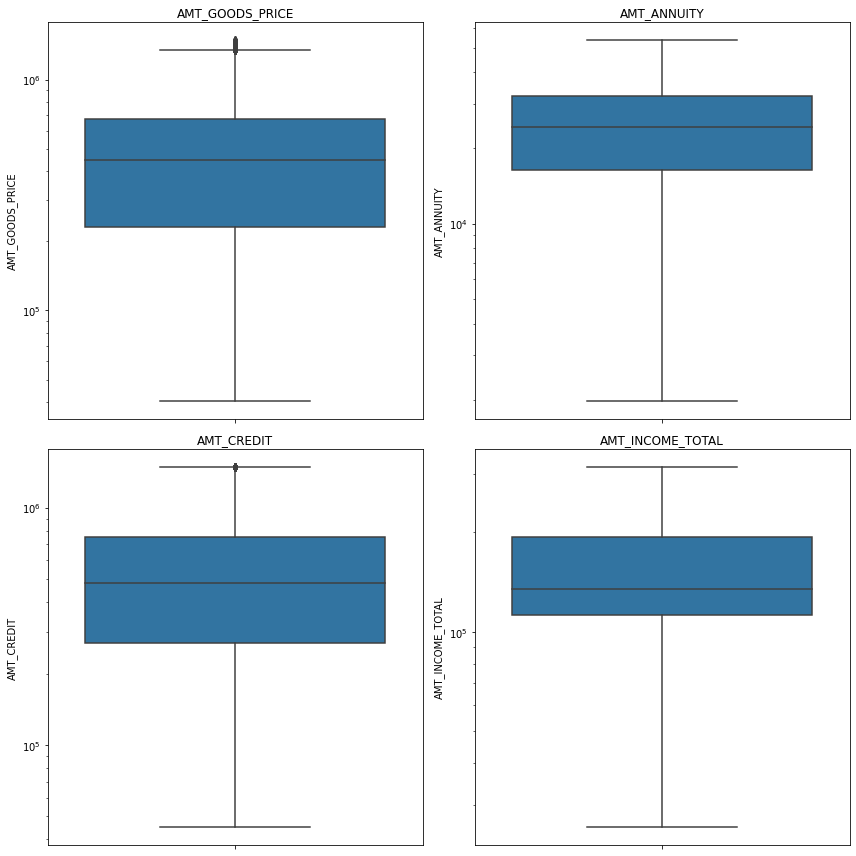

In [69]:
udf_plot_box_univariate(*quant_uni_list[:-2],data_df=app_data)

In [70]:
#creating bins for amount income total
bins=[0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slots=['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']
app_data['AMT_INCOME_TOT_RANGE']=pd.cut(app_data['AMT_INCOME_TOTAL'],bins=bins,labels=slots)

#creating bins for credit amount
bins=[0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slot=['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']
app_data['CREDIT_AMT_RANGE']=pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=slot)

In [71]:
#The dataset is divided into two different datasets(TARGET1-client facing payment difficulties, TARGET0-all other)
app_data_target0=app_data.loc[app_data["TARGET"]==0]
app_data_target1=app_data.loc[app_data["TARGET"]==1]

In [72]:
#Computation of Imbalance percentage
round(len(app_data_target0)/len(app_data_target1),2)

10.07

# Univariate analysis for Target=0(with no difficulties)

In [74]:
#Plotting in logarthemic scale
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='magma') 
        
    plt.show()

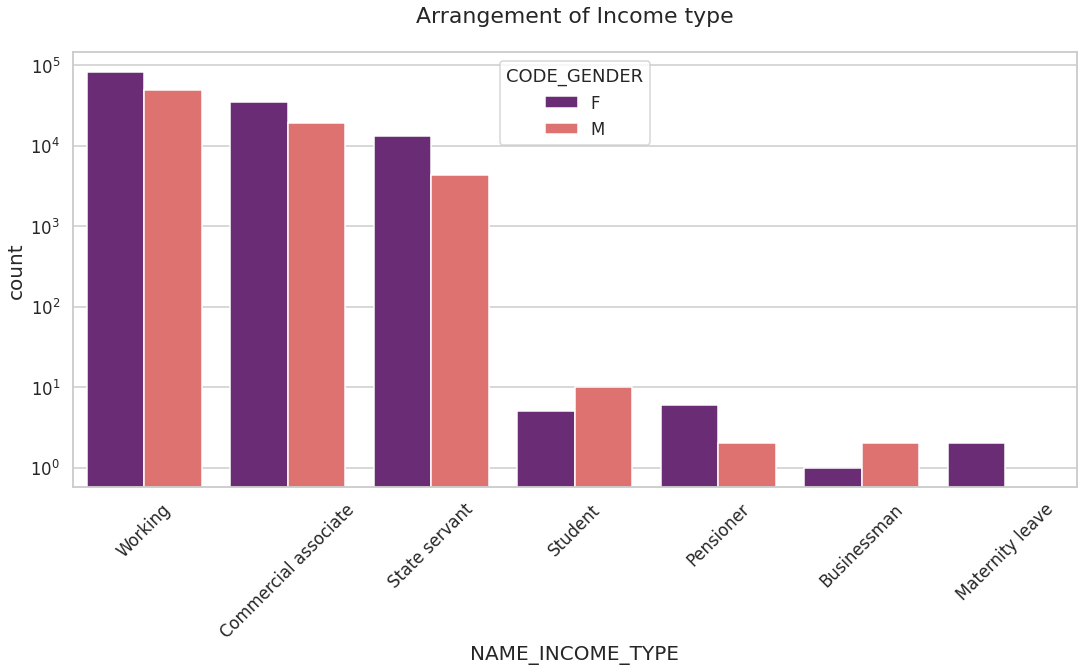

In [76]:
#plotting for type of income:
uniplot(app_data_target0,col='NAME_INCOME_TYPE',title='Arrangement of Income type',hue='CODE_GENDER')

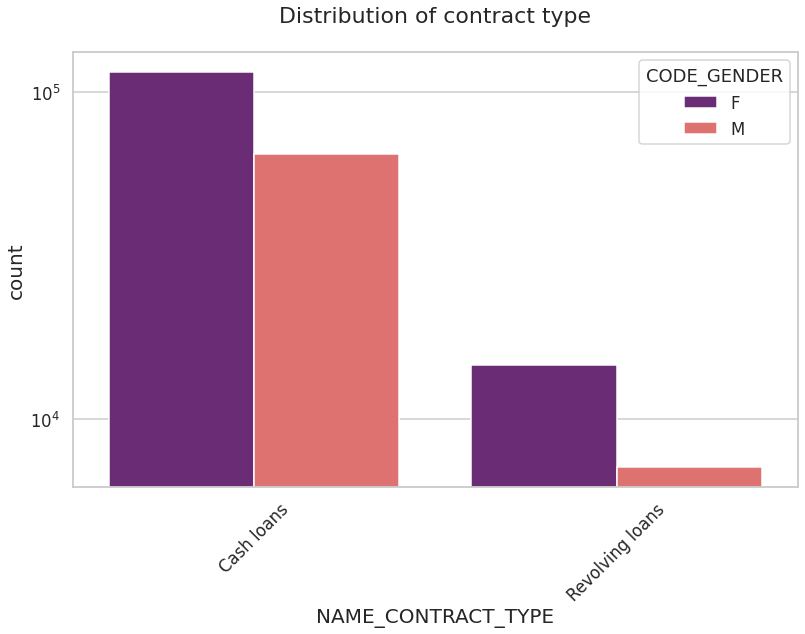

In [77]:
#plotting the distribution of contract type data
uniplot(app_data_target0,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

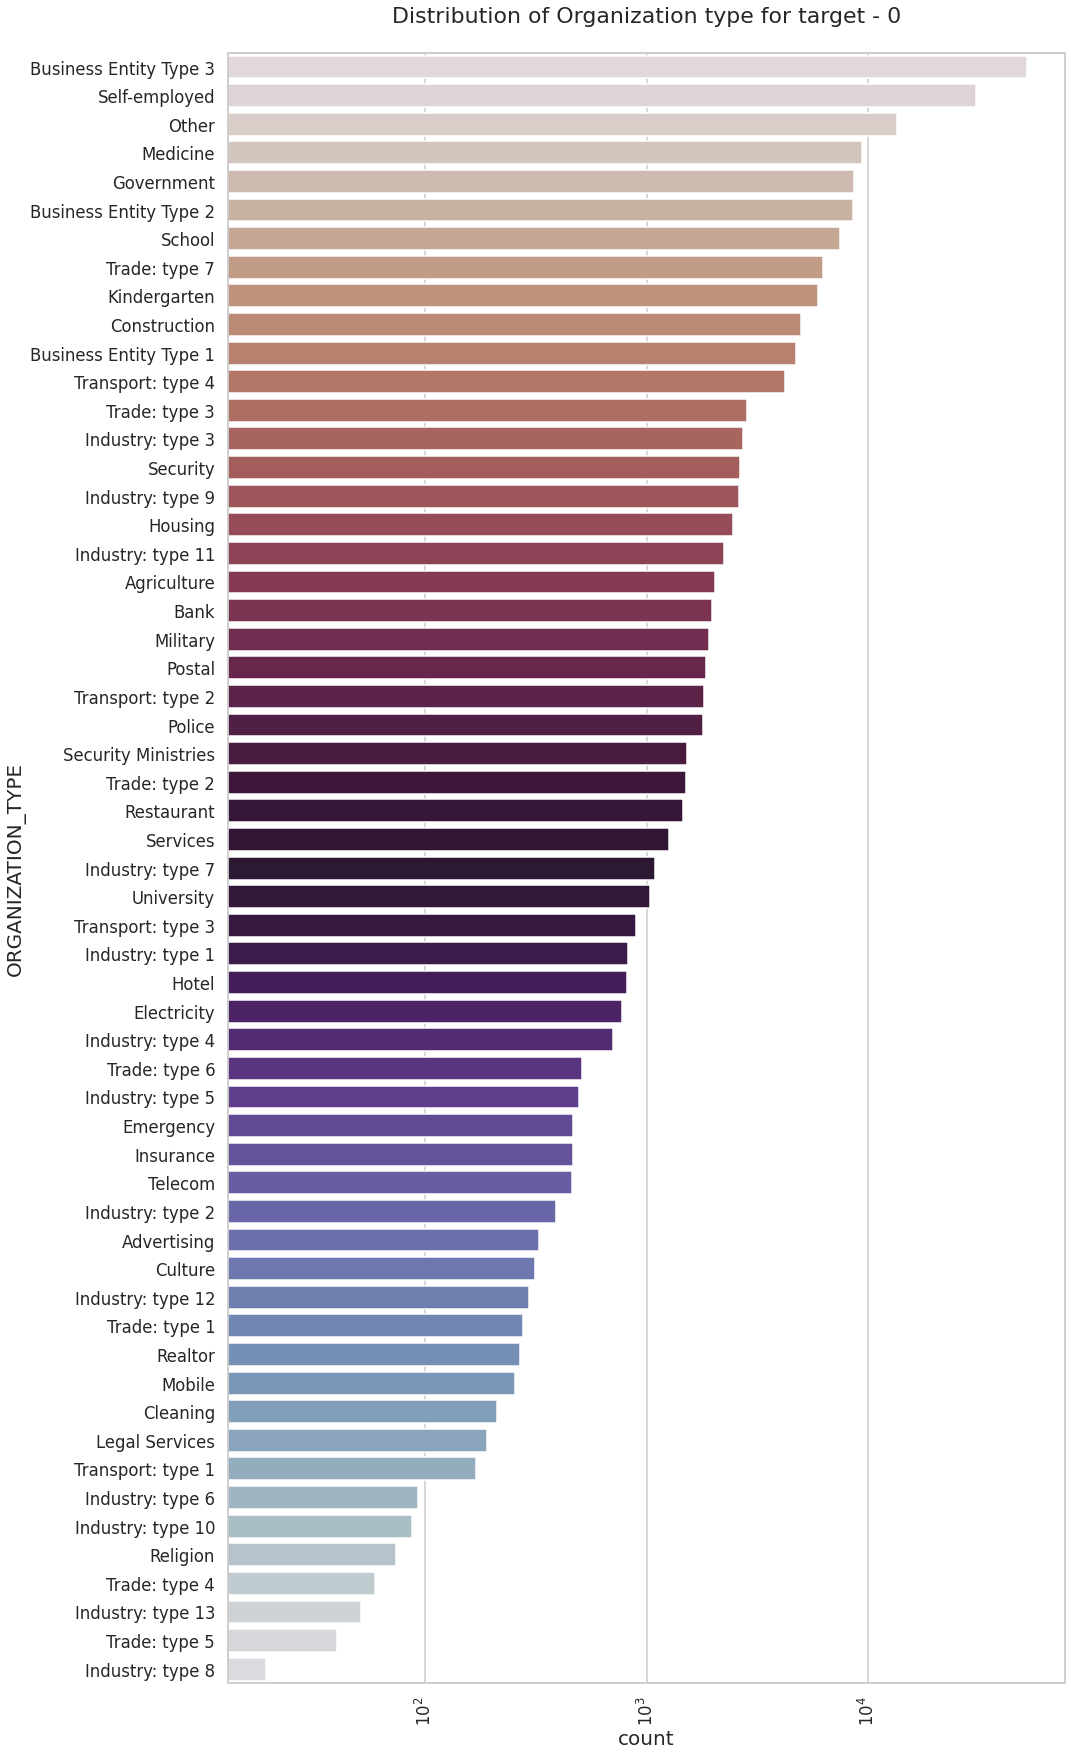

In [78]:
#plotting for type of organisation:
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 0")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=app_data_target0,y='ORGANIZATION_TYPE',order=app_data_target0['ORGANIZATION_TYPE'].value_counts().index,palette='twilight_r')

plt.show()

# Univariate analysis for Target=1(with difficulties)

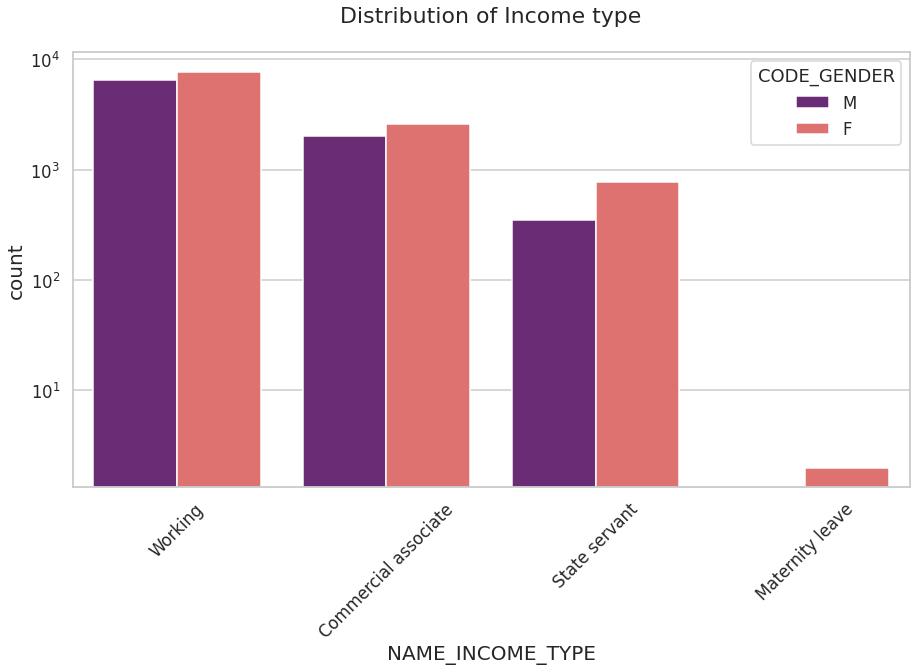

In [79]:
# Plotting for Type of income
uniplot(app_data_target1,col='NAME_INCOME_TYPE',title='Distribution of Income type',hue='CODE_GENDER')

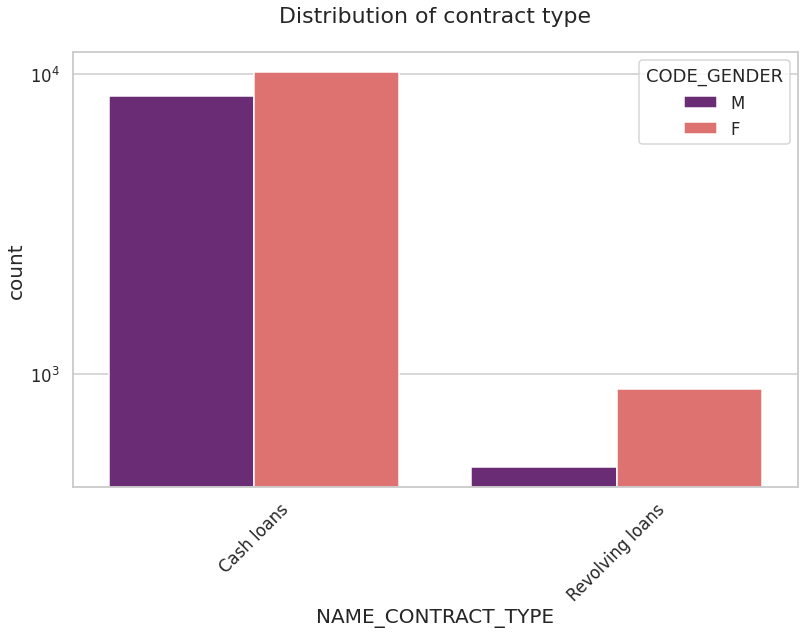

In [81]:
#plotting the distribution of contract type data
uniplot(app_data_target1,col='NAME_CONTRACT_TYPE',title='Distribution of contract type',hue='CODE_GENDER')

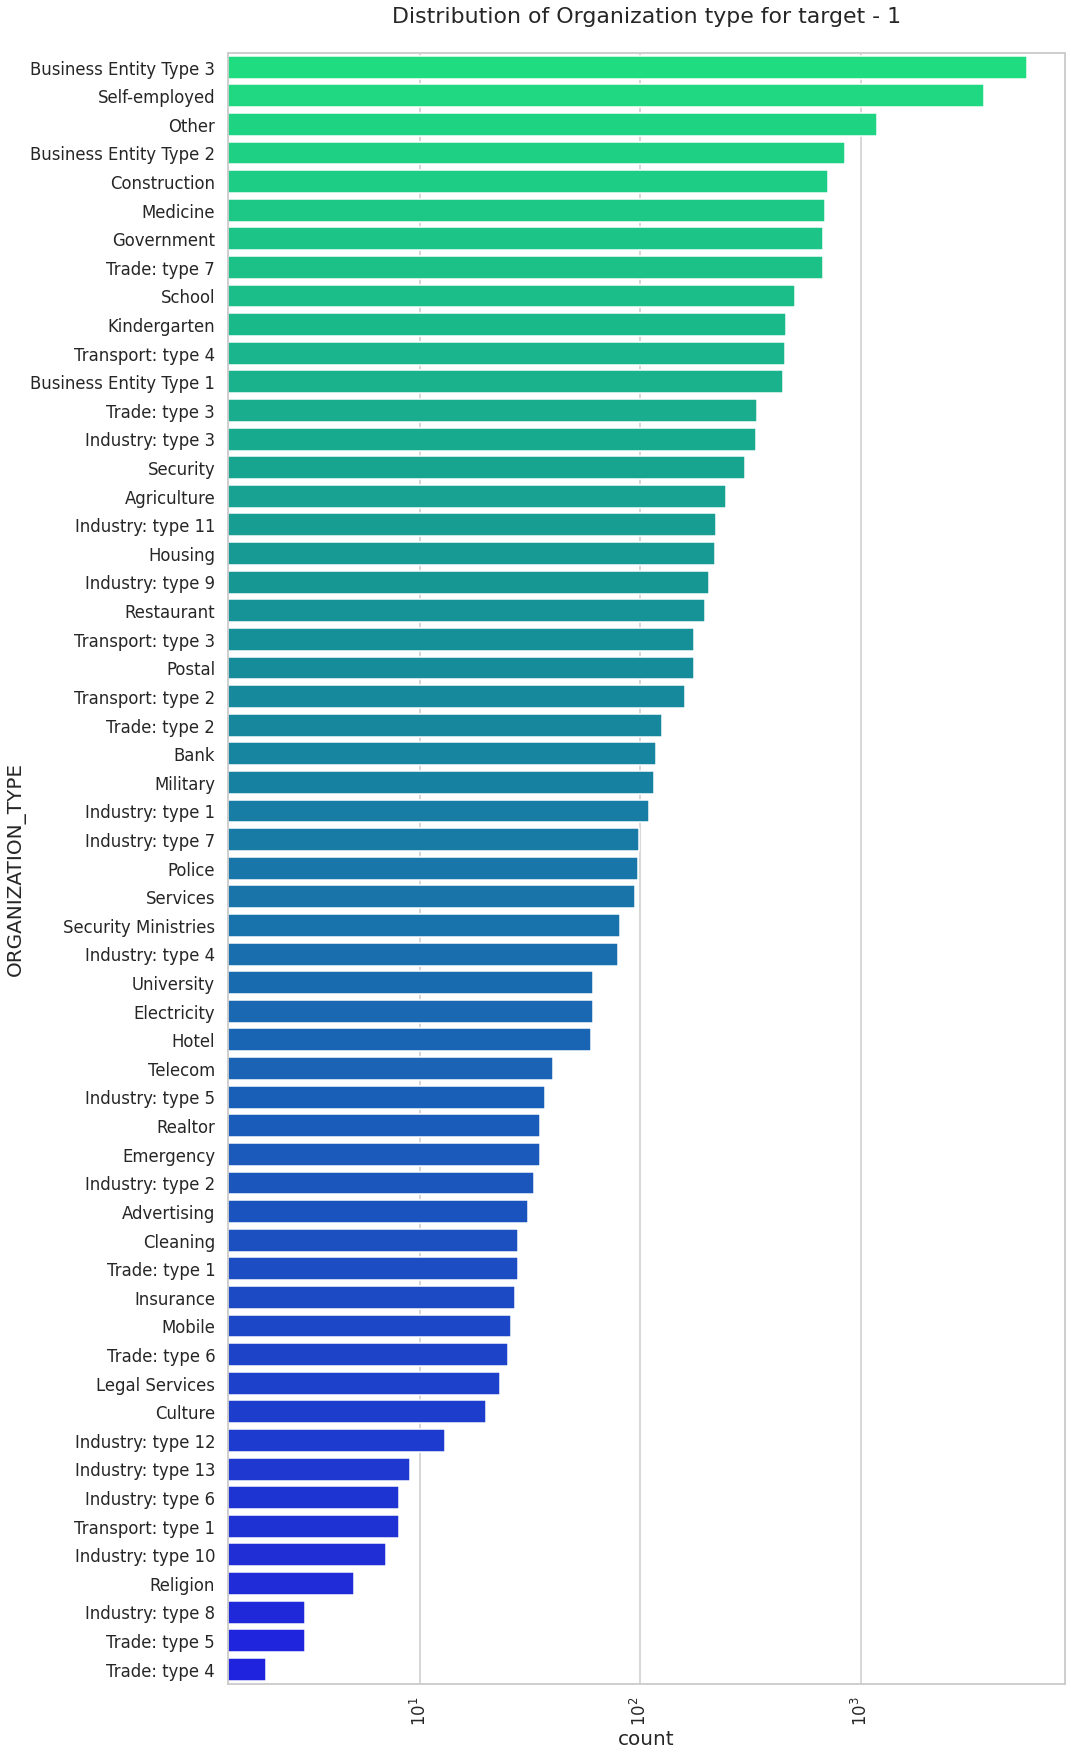

In [83]:
# Plotting for type of organisation
sns.set_style('whitegrid')
sns.set_context('talk')
plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30

plt.title("Distribution of Organization type for target - 1")

plt.xticks(rotation=90)
plt.xscale('log')

sns.countplot(data=app_data_target1,y='ORGANIZATION_TYPE',order=app_data_target1['ORGANIZATION_TYPE'].value_counts().index,palette='winter_r')

plt.show()

# Bivariate analysis for Target 0(without difficulties)

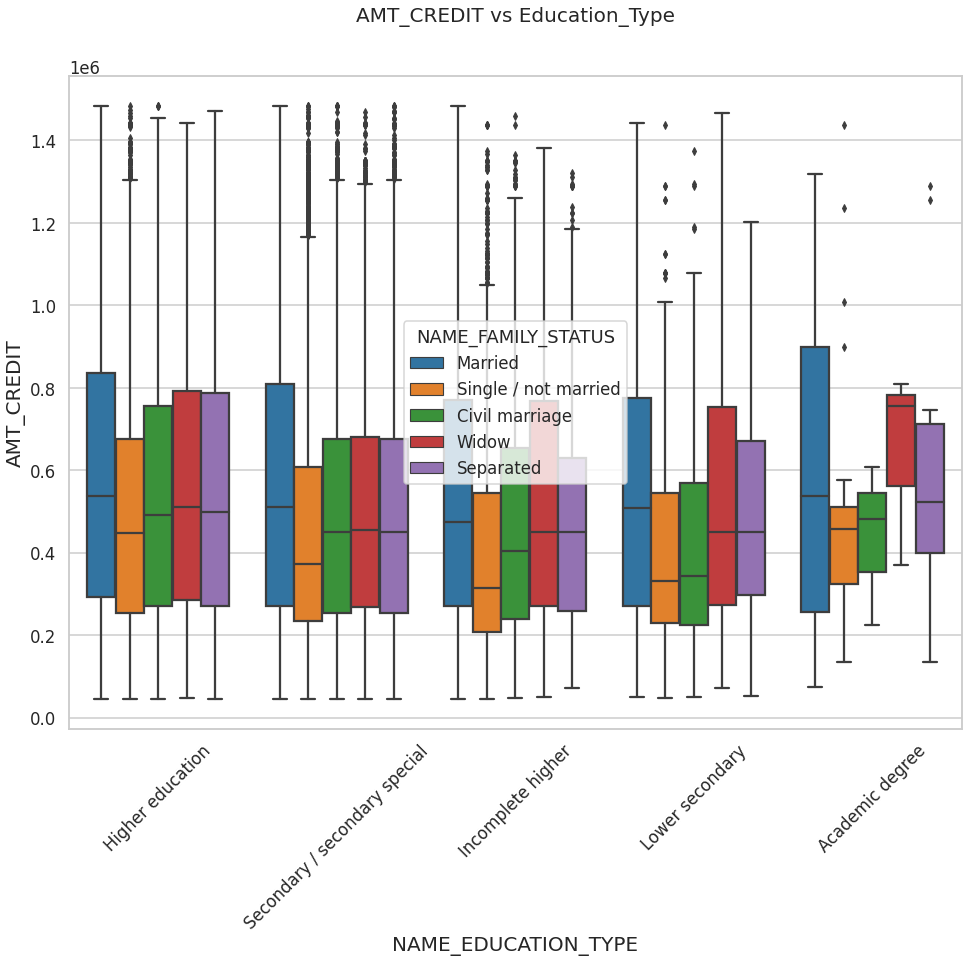

In [88]:
# Box plotting for Amount_Credit
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =app_data_target0, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_CREDIT vs Education_Type')
plt.show()

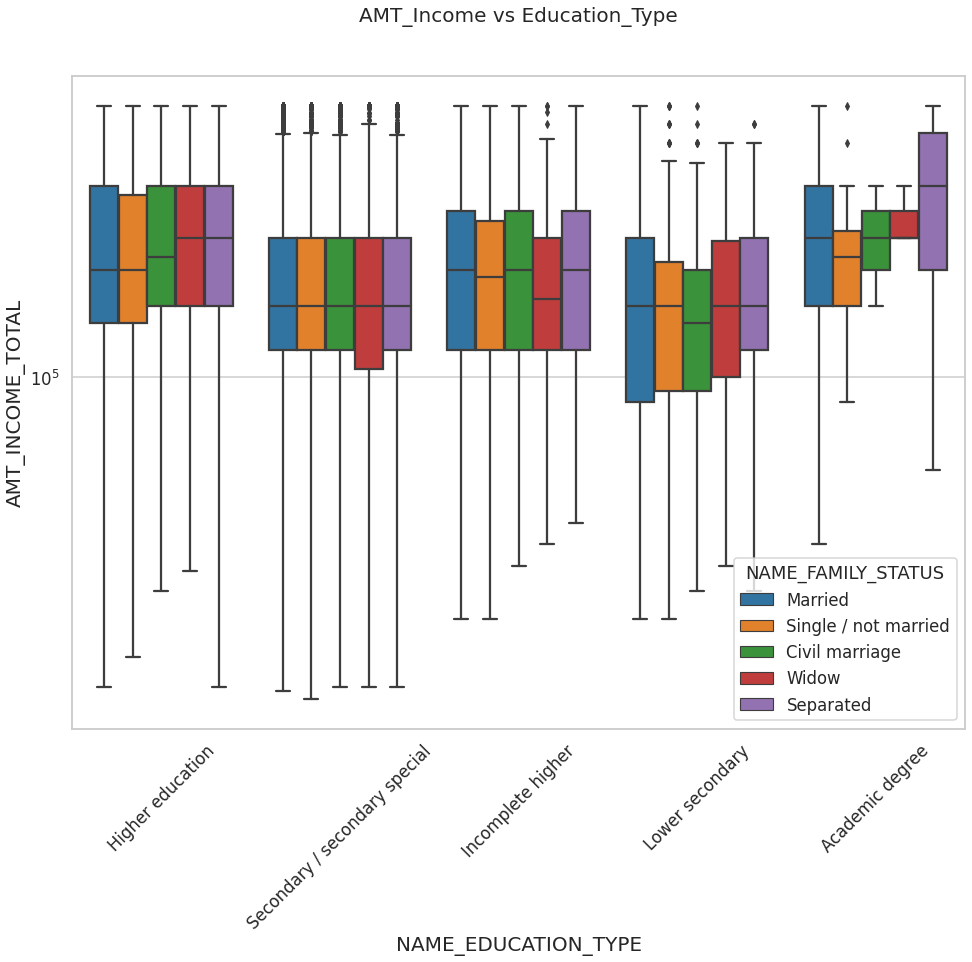

In [90]:
# Box plotting for AMT_Income
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data=app_data_target0, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_Income vs Education_Type')
plt.show()

# Bivariate analysis for Target1

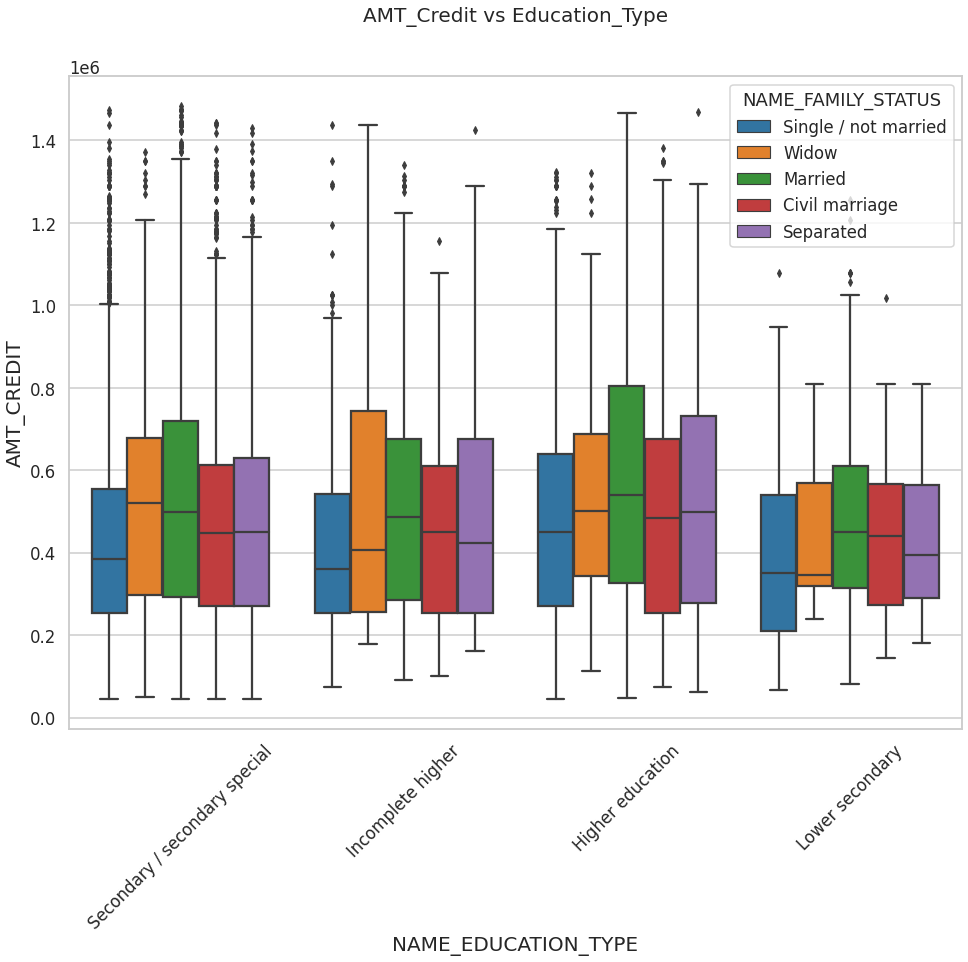

In [91]:
# Box plotting for AMT_CREDIT
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =app_data_target1, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_Credit vs Education_Type')
plt.show()

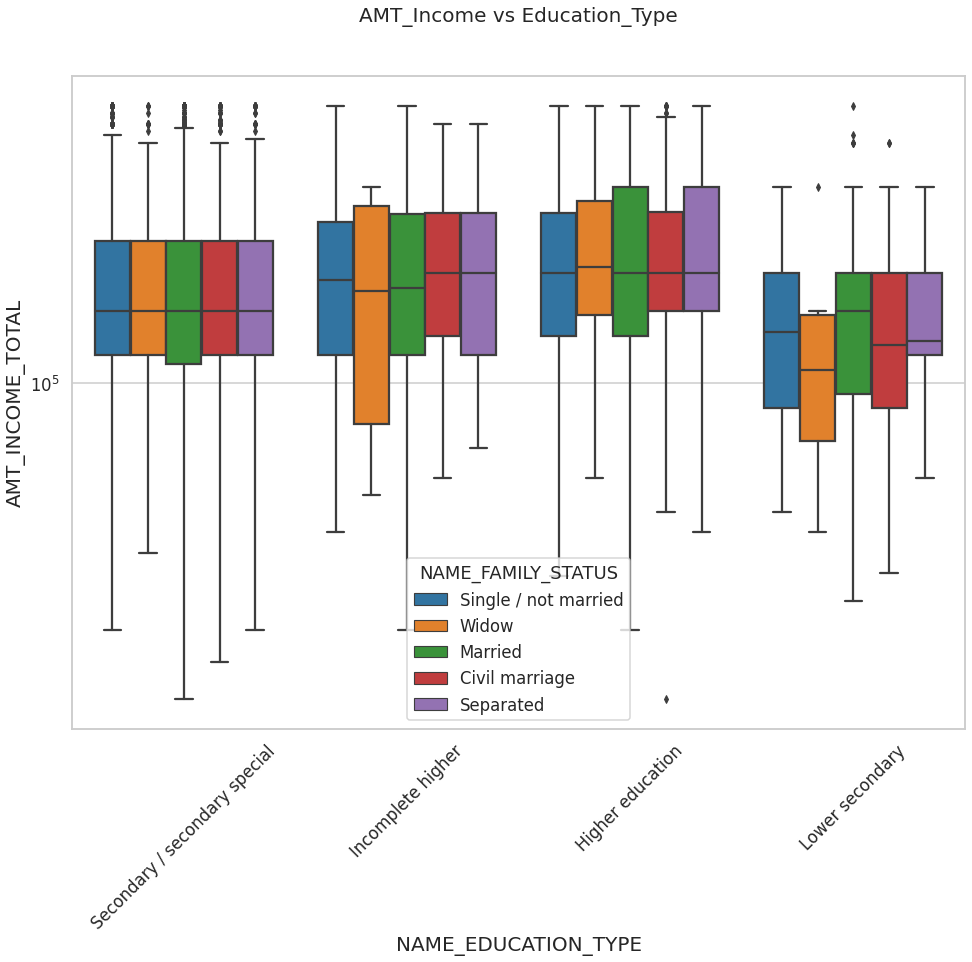

In [92]:
# Box plotting for AMT_Income
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
plt.yscale('log')
sns.boxplot(data =app_data_target1, x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL', hue ='NAME_FAMILY_STATUS',orient='v')
plt.title('AMT_Income vs Education_Type')
plt.show()

# Correlation between the variables

In [104]:
## Numeric variable : EXT_SOURCE_2, EXT_SOURCE_3, DAYS_LAST_PHONE_CHANGE, CNT_FAM_MEMBERS, DAYS_BIRTH, DAYS_ID_PUBLISH, AMT_GOODS_PRICE, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY

correl_col=["EXT_SOURCE_2", "EXT_SOURCE_3", "DAYS_BIRTH", "DAYS_ID_PUBLISH", "AMT_GOODS_PRICE", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY"]


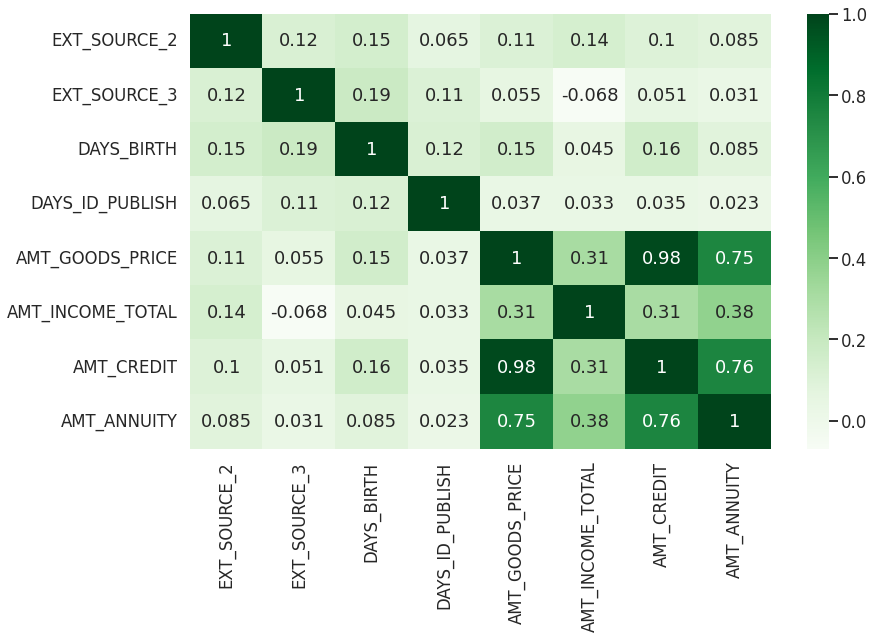

In [105]:
plt.figure(figsize=[13,8])
sns.heatmap(data=app_data[correl_col].corr(), annot=True, cmap="Greens")
plt.show()

# Previous application dataset

In [94]:
#Reading the csv file from google drive for Exploratory data analysis
previous_app=pd.read_csv('/content/drive/MyDrive/previous_application.csv')
#To check top 5 rows of dataset
previous_app.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [95]:
previous_app.shape

(1670214, 37)

In [96]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [97]:
#For checking null values in each column
previous_app.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [98]:
#For checking percentage of null values in each column
(previous_app.isnull().sum()/previous_app.shape[0])*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [99]:
#Dropping columns having percentage of null values greater than 40
previous_app.drop(columns=["AMT_DOWN_PAYMENT","RATE_DOWN_PAYMENT","RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED",
                       "NAME_TYPE_SUITE","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION",
                        "DAYS_LAST_DUE","DAYS_TERMINATION","NFLAG_INSURED_ON_APPROVAL"], inplace=True)

In [100]:
# The following columns have a range of 20 - 25% of missing values.
# AMT_ANNUITY
# AMT_GOODS_PRICE
# CNT_PAYMENT

## Imputing these columns with median values:

previous_app["AMT_ANNUITY"].replace(np.NaN,previous_app["AMT_ANNUITY"].median(), inplace=True)
previous_app["AMT_ANNUITY"].isnull().sum()
previous_app["AMT_GOODS_PRICE"].replace(np.NaN,previous_app["AMT_GOODS_PRICE"].median(), inplace=True)
previous_app["AMT_GOODS_PRICE"].isnull().sum()

0

In [101]:
#Dropping the WEEKDAY_APPR_PROCESS_START & HOUR_APPR_PROCESS_START columns which are not significant in making decisions
previous_app.drop(columns=["WEEKDAY_APPR_PROCESS_START"], inplace=True)
previous_app.drop(columns=["HOUR_APPR_PROCESS_START"] , inplace=True)

In [106]:
#DAYS_DECISION values are negative hence making them positive
previous_app["DAYS_DECISION"]=previous_app["DAYS_DECISION"].apply(lambda x:abs(x))

In [110]:
## Analysing SELLERPLACE_AREA column

previous_app["SELLERPLACE_AREA"].value_counts()
100*previous_app[previous_app["SELLERPLACE_AREA"]== -1]["SELLERPLACE_AREA"].count()/previous_app.shape[0]
## SELLERPLACE_AREA column has "-1" values (45% of total)
## boxplot for finding relation between SELLERPLACE_AREA and NAME_CONTRACT_STATUS
# sns.boxplot(data=prev_data, x="NAME_CONTRACT_STATUS", y="SELLERPLACE_AREA")
# Dropping this column

previous_app.drop(columns=["SELLERPLACE_AREA"] , inplace=True)

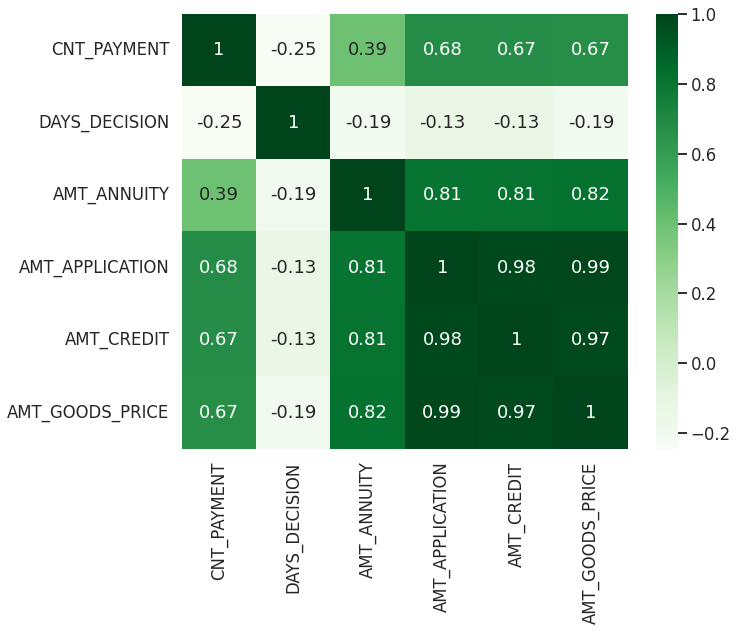

In [111]:
# CNT_PAYMENT column
## correlation of this variable with other variables

plt.figure(figsize=[10,8])
sns.heatmap(data=previous_app[["CNT_PAYMENT","DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION",
                            "AMT_CREDIT","AMT_GOODS_PRICE"]].corr(), annot=True, cmap="Greens")
plt.show()

In [113]:
# CNT PAYMENT has a good correlation with the credit requested, the amount granted, the Annuity, and the Goods Price in the previous application. 
# However, there is no date on which the previous Application was approved or rejected, and the new Application was registered.
# As a result, it would be difficult to use the CNT PAYMENT parameter to correlate the data in the previous and new applications.
# As a result, this column has been removed.
previous_app.drop(columns=["CNT_PAYMENT"] , inplace=True)


In [114]:
## Removing the missing values in PRODUCT_COMBINATION column

previous_app["PRODUCT_COMBINATION"].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

In [115]:
## Imputing null values with "Missing" product combination
previous_app["PRODUCT_COMBINATION"].replace(np.NaN, "Missing", inplace=True)

In [116]:
previous_app.shape

(1670214, 22)

In [117]:
previous_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1670214 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1670214 non-null  float64
 7   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 8   NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 9   NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 10  NAME_CONTRACT_STATUS         1670214 non-null  object 
 11  DAYS_DECISION                1670214 non-null  int64  
 12  NAME_PAYMENT_TYPE            1670214 non-n

In [118]:
previous_app.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_GOODS_PRICE  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  
count  1.670213e+06     1.670214e+06            1.670214e+06   1.670214e+06  
mean   1.961140e+05     2.011815e+05            9.964675e-01   8.806797e+02  
std    3.185746e+05     2.808629e+05            5.932963e-02   7.790997e+02  
min    0.000000e+00     0.000000e+00            0.000000e+00   1.000000e+00  
25%    2.416050e+04     6.750000e+04            1.000000e+00   2.800000e+02  
50%    8.054100e+04     1.123200e+05            1.000000e+00   5.810000e+02  
75%    2.164185e+05     1.804050e+05            1.000000e+00   1.300000e+03  
max    6.905160e+06     6.905160e+06            1.000000e+00   2.922000e+03

# Handling missing values

In [119]:
previous_app.select_dtypes(exclude="object")

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  \
0           2030495      271877     1730.430          17145.0     17145.0   
1           2802425      108129    25188.615         607500.0    679671.0   
2           2523466      122040    15060.735         112500.0    136444.5   
3           2819243      176158    47041.335         450000.0    470790.0   
4           1784265      202054    31924.395         337500.0    404055.0   
...             ...         ...          ...              ...         ...   
1670209     2300464      352015    14704.290         267295.5    311400.0   
1670210     2357031      334635     6622.020          87750.0     64291.5   
1670211     2659632      249544    11520.855         105237.0    102523.5   
1670212     2785582      400317    18821.520         180000.0    191880.0   
1670213     2418762      261212    16431.300         360000.0    360000.0   

         AMT_GOODS_PRICE  NFLAG_LAST_APPL_IN_DAY  DAYS_DECISION  
0                17145.0                       1             73  
1               607500.0                       1            164  
2               112500.0                       1            301  
3               450000.0                       1            512  
4               337500.0                       1            781  
...                  ...                     ...            ...  
1670209         267295.5                       1            544  
1670210          87750.0                       1           1694  
1670211         105237.0                       1           1488  
1670212         180000.0                       1           1185  
1670213         360000.0                       1           1193  

[1670214 rows x 8 columns]

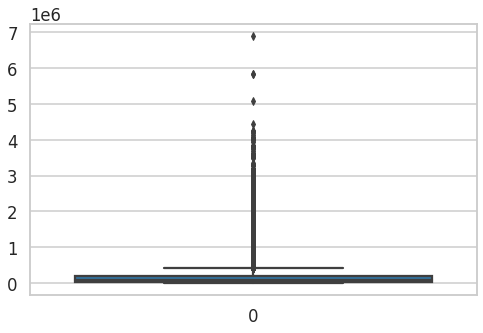

In [120]:
## Below 3 columns to be verified for outliers

# AMT_APPLICATION
# AMT_CREDIT 
# DAYS_DECISION
plt.figure(figsize=[8,5])
sns.boxplot(data=previous_app["AMT_APPLICATION"])
plt.show()

In [122]:
previous_app["AMT_APPLICATION"].describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

In [123]:
Q1=previous_app["AMT_APPLICATION"].quantile(0.25)
Q3=previous_app["AMT_APPLICATION"].quantile(0.75)
print("Upper limit = ", Q3+1.5*(Q3-Q1))

ul=Q3+1.5*(Q3-Q1)
100*previous_app[previous_app["AMT_APPLICATION"]>ul]["AMT_APPLICATION"].count()/previous_app.shape[0]

Upper limit =  422820.0


12.45463156218305

In [125]:
## plot contains 12% of values above the upper Whisker, 
## Hence we cannot remove the rows, so we can cap the values to the median

previous_app[previous_app["AMT_APPLICATION"]>ul]["AMT_APPLICATION"]
previous_app["AMT_APPLICATION"].median()
previous_app.loc[previous_app[previous_app["AMT_APPLICATION"]>ul].index,["AMT_APPLICATION"]]=previous_app["AMT_APPLICATION"].median()

In [126]:
previous_app["AMT_APPLICATION"].describe()

count    1.670214e+06
mean     8.294869e+04
std      8.588188e+04
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.125900e+05
max      4.228200e+05
Name: AMT_APPLICATION, dtype: float64

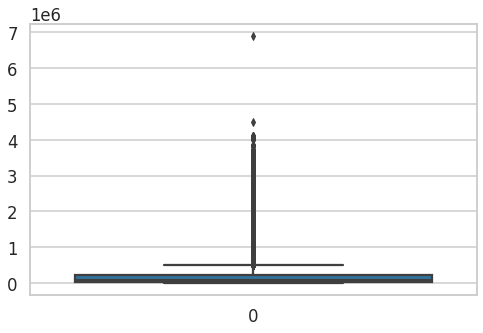

In [127]:
# AMT_CREDIT  - Check for Outliers
plt.figure(figsize=[8,5])
sns.boxplot(data=previous_app["AMT_CREDIT"])
plt.show()

In [128]:
previous_app["AMT_CREDIT"].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

In [129]:
Q1=previous_app["AMT_CREDIT"].quantile(0.25)
Q3=previous_app["AMT_CREDIT"].quantile(0.75)
print("Upper limit = ", Q3+1.5*(Q3-Q1))

ul=Q3+1.5*(Q3-Q1)
100*previous_app[previous_app["AMT_CREDIT"]>ul]["AMT_CREDIT"].count()/previous_app.shape[0]

Upper limit =  504805.5


10.776403502784673

In [130]:
## For avoiding deviation in the analysis we need to cap the values to median
previous_app.loc[previous_app[previous_app["AMT_CREDIT"]>ul].index,["AMT_CREDIT"]]= previous_app["AMT_CREDIT"].median()

In [131]:
previous_app["AMT_CREDIT"].describe()

count    1.670213e+06
mean     1.018242e+05
std      1.104948e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      1.350000e+05
max      5.048055e+05
Name: AMT_CREDIT, dtype: float64

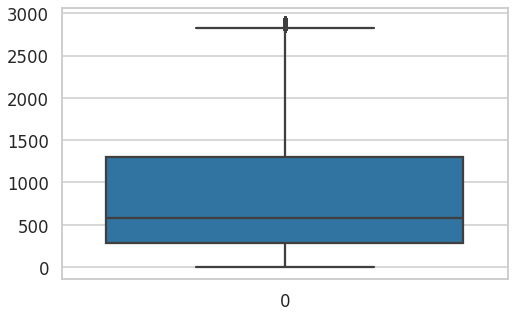

In [132]:
## DAYS_DECISION column
plt.figure(figsize=[8,5])
sns.boxplot(data=previous_app["DAYS_DECISION"])
plt.show()

## Categorical columns

* NAME_CONTRACT_TYPE
* FLAG_LAST_APPL_PER_CONTRACT
* NFLAG_LAST_APPL_IN_DAY
* NAME_CASH_LOAN_PURPOSE
* NAME_CONTRACT_STATUS
* NAME_PAYMENT_TYPE
* CODE_REJECT_REASON
* NAME_CLIENT_TYPE
* NAME_GOODS_CATEGORY
* NAME_PORTFOLIO
* NAME_PRODUCT_TYPE
* CHANNEL_TYPE
* NAME_SELLER_INDUSTRY
* NAME_YIELD_GROUP
* PRODUCT_COMBINATION

In [133]:
previous_app["NAME_CONTRACT_TYPE"].value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [134]:
## Deleting rows which contains missing values (XNA) in the coulmn NAME_CONTRACT_TYPE

previous_app.drop(index= previous_app[previous_app["NAME_CONTRACT_TYPE"]=='XNA'].index, inplace=True)

In [135]:
previous_app["NAME_CASH_LOAN_PURPOSE"].value_counts()

XAP                                 922315
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [136]:
previous_app["NAME_CONTRACT_STATUS"].value_counts()

Approved        1036781
Canceled         316004
Refused          290647
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [137]:
previous_app["NAME_PAYMENT_TYPE"].value_counts()

Cash through the bank                        1033552
XNA                                           627038
Non-cash from your account                      8193
Cashless from the account of the employer       1085
Name: NAME_PAYMENT_TYPE, dtype: int64

In [138]:
previous_app["CODE_REJECT_REASON"].value_counts()

XAP       1352778
HC         175202
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5242
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [139]:
previous_app["NAME_CLIENT_TYPE"].value_counts()

Repeater     1230960
New           301342
Refreshed     135625
XNA             1941
Name: NAME_CLIENT_TYPE, dtype: int64

In [140]:
100*previous_app[previous_app["NAME_CLIENT_TYPE"]=='XNA']["NAME_CLIENT_TYPE"].count()/previous_app.shape[0]

0.11623673248424427

In [141]:
#Dropping null value rows
previous_app.drop(index= previous_app[previous_app["NAME_CLIENT_TYPE"]=='XNA'].index, inplace=True)

In [142]:
previous_app["NAME_GOODS_CATEGORY"].value_counts()

XNA                         949028
Mobile                      224550
Consumer Electronics        121499
Computers                   105693
Audio/Video                  99376
Furniture                    53612
Photo / Cinema Equipment     25011
Construction Materials       24972
Clothing and Accessories     23532
Auto Accessories              7375
Jewelry                       6277
Homewares                     5020
Medical Supplies              3842
Vehicles                      3369
Sport and Leisure             2980
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1548
Direct Sales                   442
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [143]:
previous_app["NAME_PORTFOLIO"].value_counts()

POS      690539
Cash     461238
XNA      370844
Cards    144881
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [144]:
100*previous_app[previous_app["NAME_PORTFOLIO"]=='XNA']["NAME_PORTFOLIO"].count()/previous_app.shape[0]

22.23382678018882

In [145]:
previous_app["NAME_PRODUCT_TYPE"].value_counts()

XNA        1061808
x-sell      455945
walk-in     150174
Name: NAME_PRODUCT_TYPE, dtype: int64

In [146]:
previous_app["CHANNEL_TYPE"].value_counts()

Credit and cash offices       718760
Country-wide                  494013
Stone                         211967
Regional / Local              108435
Contact center                 71145
AP+ (Cash loan)                57017
Channel of corporate sales      6138
Car dealer                       452
Name: CHANNEL_TYPE, dtype: int64

In [147]:
previous_app["NAME_SELLER_INDUSTRY"].value_counts()

XNA                     854311
Consumer electronics    398016
Connectivity            275505
Furniture                57813
Construction             29761
Clothing                 23926
Industry                 19194
Auto technology           4984
Jewelry                   2695
MLM partners              1209
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64

In [148]:
previous_app["NAME_YIELD_GROUP"].value_counts()

XNA           515725
middle        385220
high          353261
low_normal    321773
low_action     91948
Name: NAME_YIELD_GROUP, dtype: int64

In [149]:
previous_app["PRODUCT_COMBINATION"].value_counts()

Cash                              285097
POS household with interest       263486
POS mobile with interest          220519
Cash X-Sell: middle               143777
Cash X-Sell: low                  130108
Card Street                       112436
POS industry with interest         98759
POS household without interest     82840
Card X-Sell                        80512
Cash Street: high                  59639
Cash X-Sell: high                  59276
Cash Street: middle                34657
Cash Street: low                   33781
POS mobile without interest        24045
POS other with interest            23859
POS industry without interest      12587
POS others without interest         2549
Name: PRODUCT_COMBINATION, dtype: int64

# Univariate analysis (Previous_application dataset)

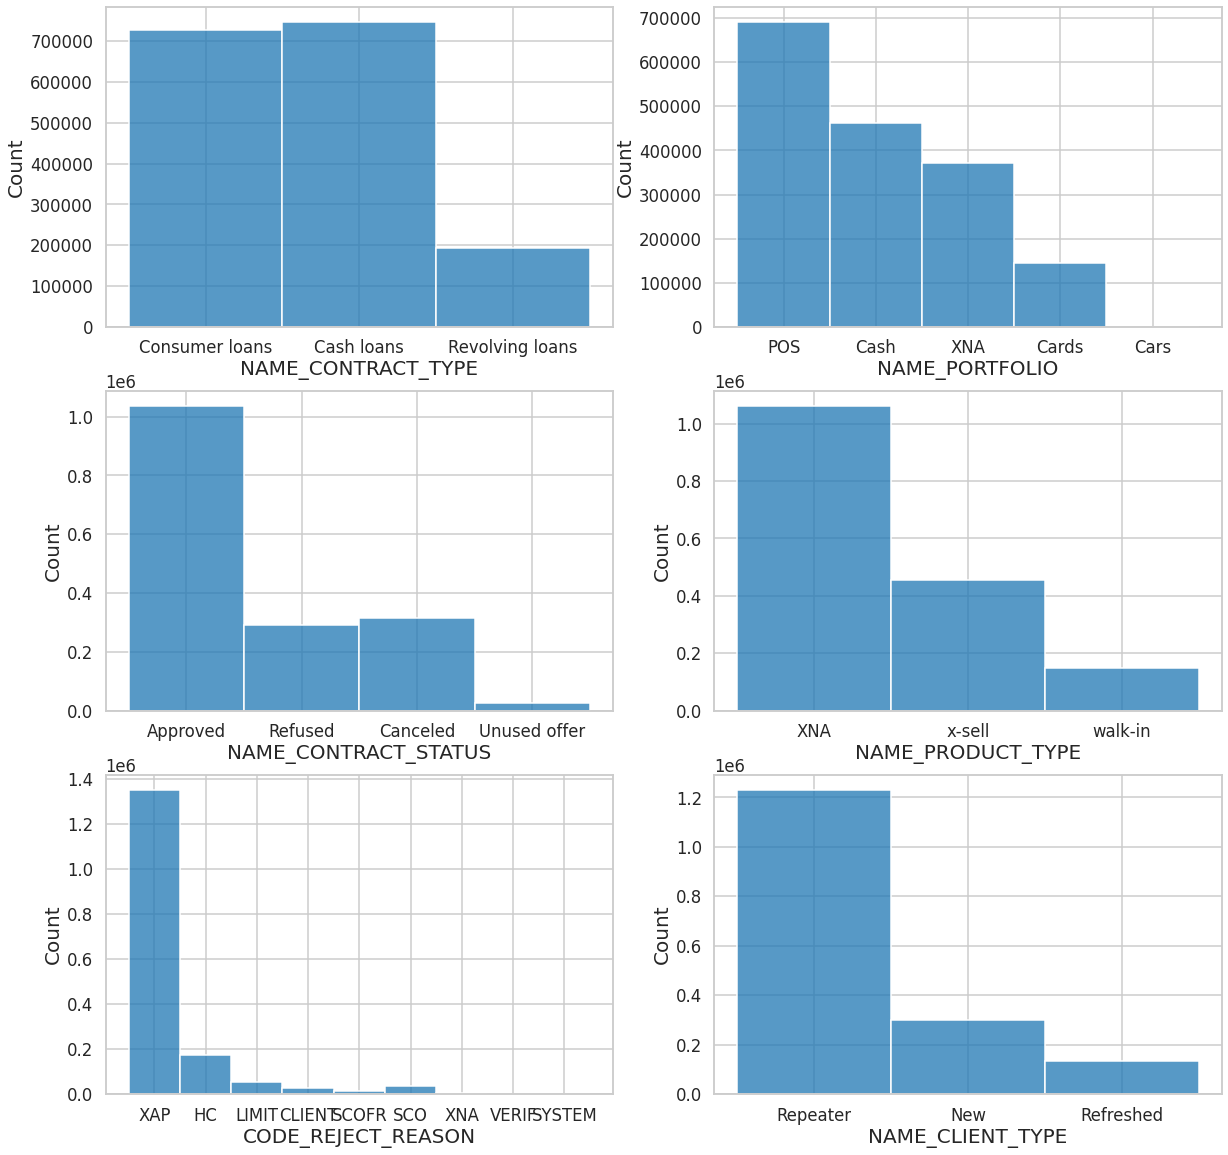

In [150]:
plt.figure(figsize=[20,20])

plt.subplot(3,2,1)

sns.histplot(data=previous_app["NAME_CONTRACT_TYPE"])

plt.subplot(3,2,2)

sns.histplot(data=previous_app["NAME_PORTFOLIO"])
# plt.xticks(rotation=90)

plt.subplot(3,2,3)

sns.histplot(data=previous_app["NAME_CONTRACT_STATUS"])


plt.subplot(3,2,4)

sns.histplot(data=previous_app["NAME_PRODUCT_TYPE"])
# plt.xticks(rotation=90)
plt.subplot(3,2,5)

sns.histplot(data=previous_app["CODE_REJECT_REASON"])


plt.subplot(3,2,6)

sns.histplot(data=previous_app["NAME_CLIENT_TYPE"])


plt.show()

## Observation:
- Compared to Revolving loans, Cash loans and Consumer loans were more
- Compared to walk-ins x-sell applications were more


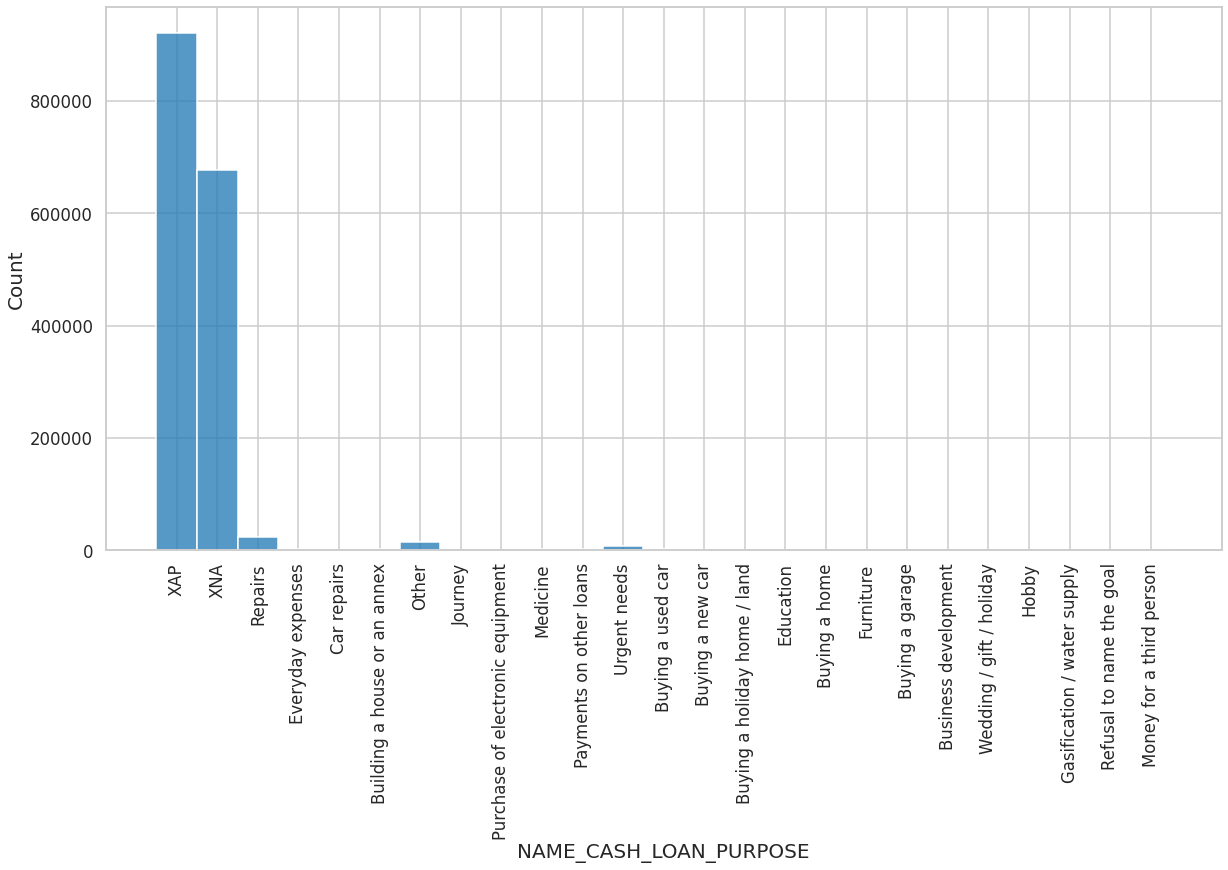

In [151]:
plt.figure(figsize=[20,10])
sns.histplot(data=previous_app["NAME_CASH_LOAN_PURPOSE"])
plt.xticks(rotation=90)
plt.show()

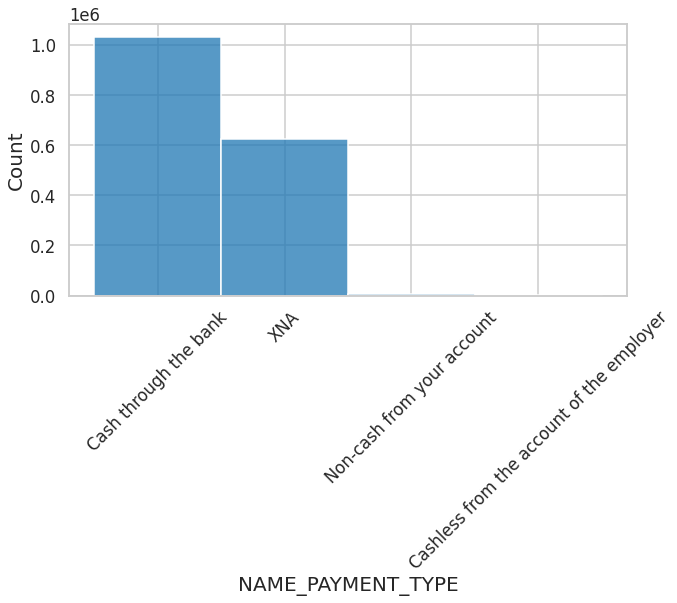

In [152]:
plt.figure(figsize=[10,5])
sns.histplot(data=previous_app["NAME_PAYMENT_TYPE"])
plt.xticks(rotation=45)
plt.show()

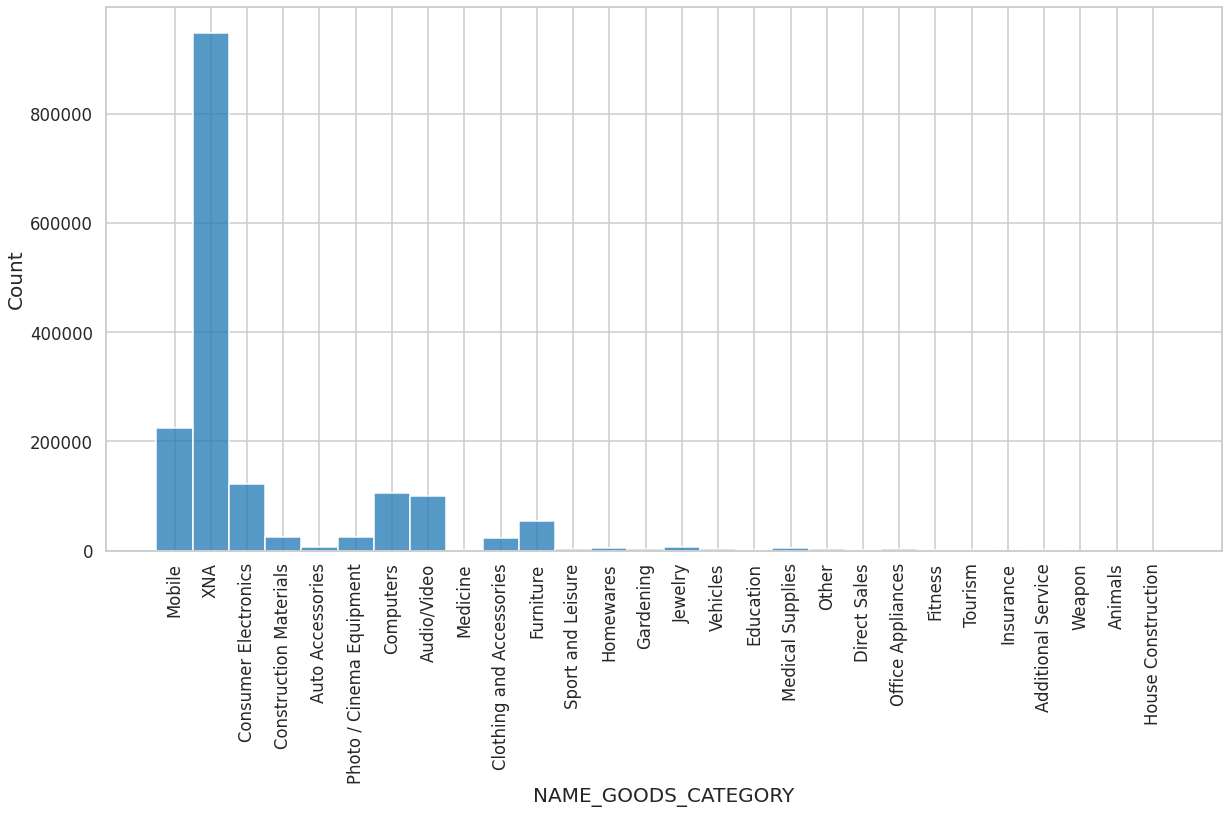

In [153]:
plt.figure(figsize=[20,10])
sns.histplot(data=previous_app["NAME_GOODS_CATEGORY"])
plt.xticks(rotation=90)
plt.show()

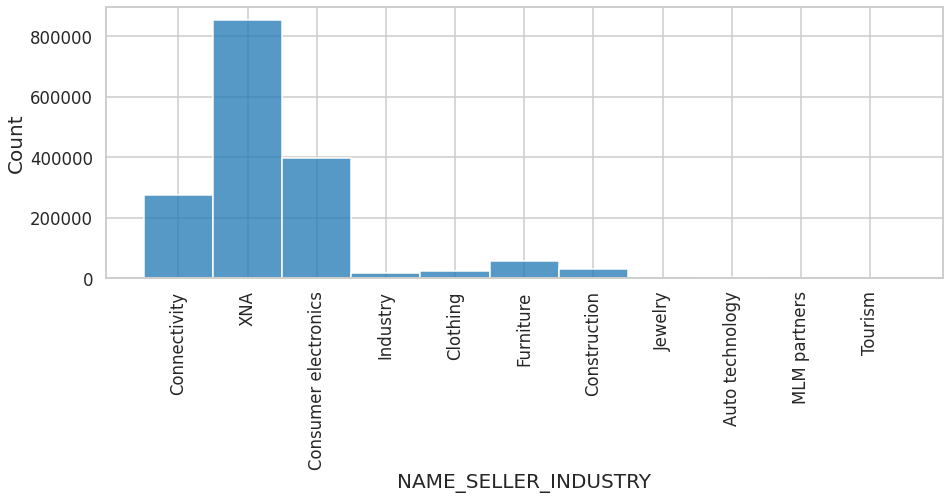

In [154]:
plt.figure(figsize=[15,5])
sns.histplot(data=previous_app["NAME_SELLER_INDUSTRY"])
plt.xticks(rotation=90)
plt.show()

## Observation (from above graphs):
- Consumer electronics has taken maximum loans

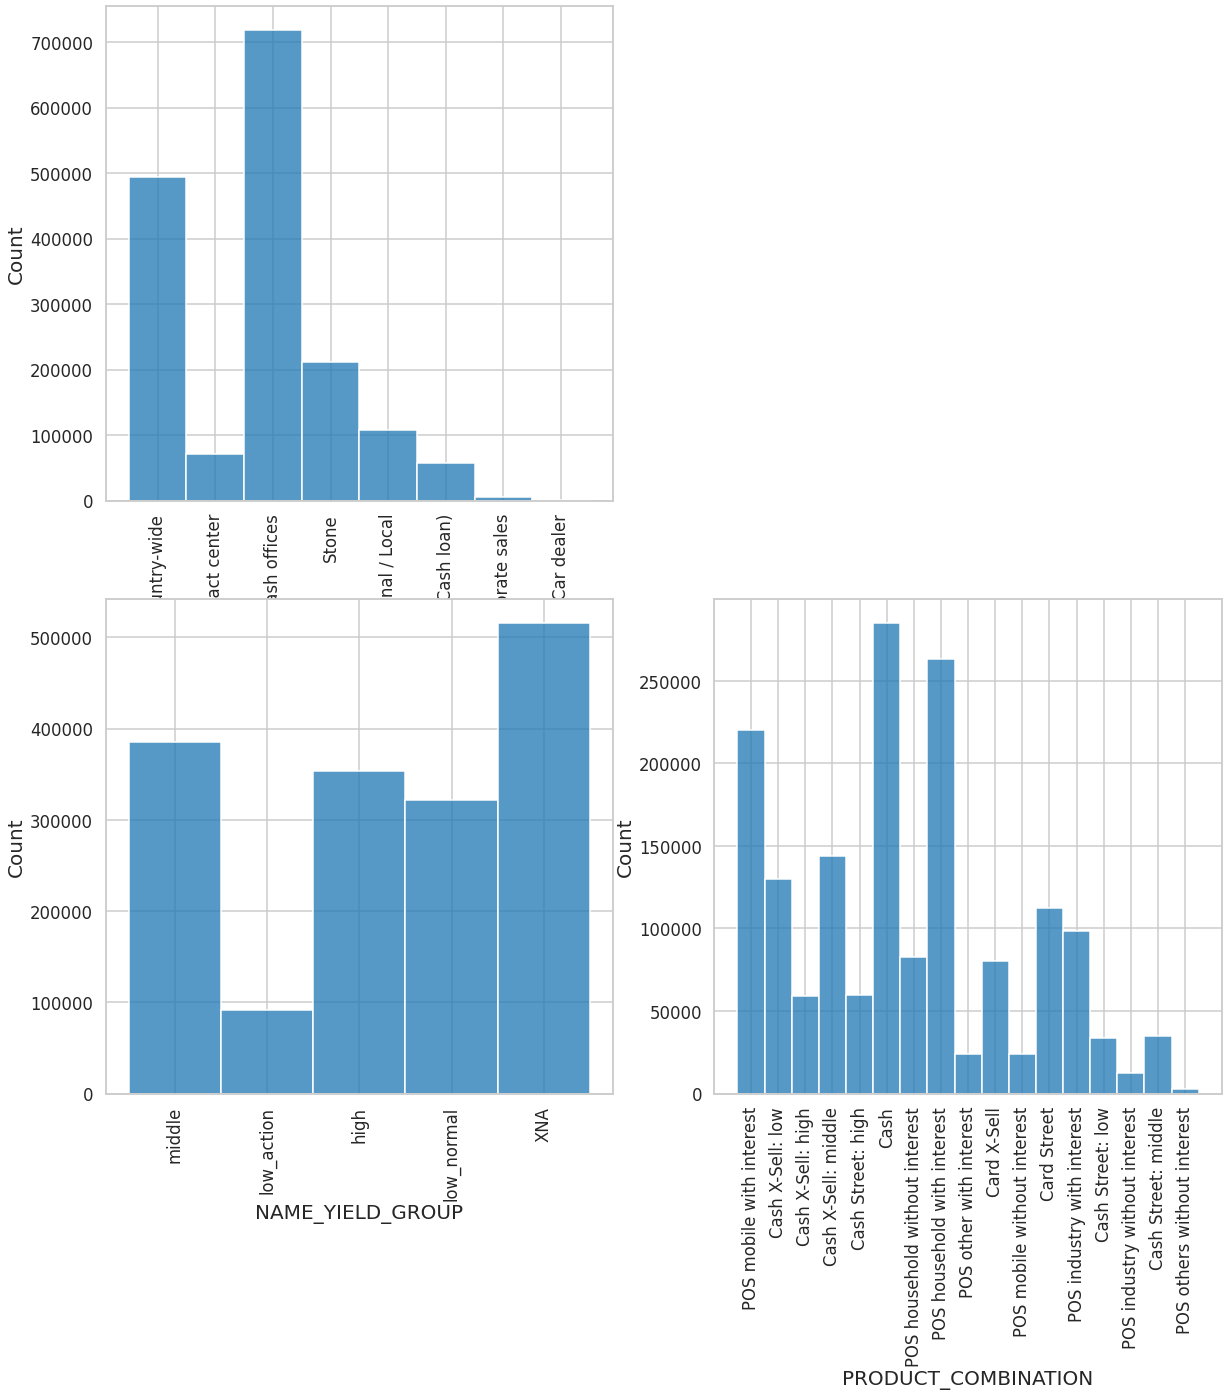

In [155]:
plt.figure(figsize=[20,20])

plt.subplot(2,2,1)
sns.histplot(data=previous_app["CHANNEL_TYPE"])
plt.xticks(rotation=90)


plt.subplot(2,2,3)
sns.histplot(data=previous_app["NAME_YIELD_GROUP"])
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.histplot(data=previous_app["PRODUCT_COMBINATION"])
plt.xticks(rotation=90)

plt.show()

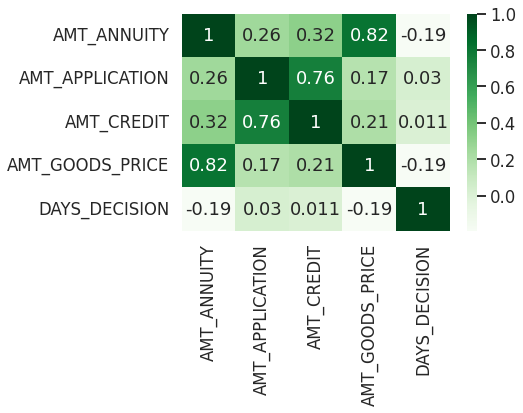

In [156]:
sns.heatmap(data=previous_app[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT",
                            "AMT_GOODS_PRICE","DAYS_DECISION"]].corr(), annot=True, cmap="Greens")
plt.show()

## Observation:

- Goods Price are highly correlated with annuity.
- AMT_CREDIT and AMT_APPLICATION have good correlation

## Merging application_data and previous_application_data

In [158]:
df=app_data.merge(previous_app, how='left', on='SK_ID_CURR')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
0      100002       1           Cash loans           M               Y   
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
0          202500.0      406597.5        24700.5           351000.0   
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
0        9461            637             3648.0             2120   
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0        Laborers                  WEDNESDAY                       10   
1      Core staff                     MONDAY                       11   
2      Core staff                     MONDAY                       11   
3      Core staff                     MONDAY                       11   
4        Laborers                     MONDAY                        9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
0                       0                        0  Business Entity Type 3   
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
0      0.262949      0.139376                       2.0   
1      0.622246           NaN                       1.0   
2      0.622246           NaN                       1.0   
3 

In [159]:
df.shape

(1016456, 64)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016456 entries, 0 to 1016455
Data columns (total 64 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1016456 non-null  int64   
 1   TARGET                       1016456 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1016456 non-null  object  
 3   CODE_GENDER                  1016456 non-null  object  
 4   FLAG_OWN_REALTY              1016456 non-null  object  
 5   AMT_INCOME_TOTAL             1016456 non-null  float64 
 6   AMT_CREDIT_x                 1016456 non-null  float64 
 7   AMT_ANNUITY_x                1016456 non-null  float64 
 8   AMT_GOODS_PRICE_x            1016456 non-null  float64 
 9   NAME_TYPE_SUITE              1016456 non-null  object  
 10  NAME_INCOME_TYPE             1016456 non-null  object  
 11  NAME_EDUCATION_TYPE          1016456 non-null  object  
 12  NAME_FAMILY_STATUS          

In [161]:
column=df.columns

In [162]:
#Dropping SK_ID_PREV which is not significant
df.drop(columns="SK_ID_PREV",inplace=True)

In [163]:
df[['AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count               1.016456e+06                1.016456e+06   
mean                6.046499e-03                3.353416e-02   
std                 1.038431e-01                1.980493e-01   
min                 0.000000e+00                0.000000e+00   
25%                 0.000000e+00                0.000000e+00   
50%                 0.000000e+00                0.000000e+00   
75%                 0.000000e+00                0.000000e+00   
max                 9.000000e+00                8.000000e+00   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count               1.016456e+06               1.016456e+06   
mean                2.690928e-01               3.049183e-01   
std                 9.238411e-01               6.816950e-01   
min                 0.000000e+00               0.000000e+00   
25%                 0.000000e+00               0.000000e+00   
50%                 0.000000e+00               0.000000e+00   
75%                 0.000000e+00               0.000000e+00   
max                 2.400000e+01               1.900000e+01   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                1.016456e+06  
mean                 2.581230e+00  
std                  2.097904e+00  
min                  0.000000e+00  
25%                  1.000000e+00  
50%                  2.000000e+00  
75%                  4.000000e+00  
max                  2.300000e+01

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016456 entries, 0 to 1016455
Data columns (total 58 columns):
 #   Column                       Non-Null Count    Dtype   
---  ------                       --------------    -----   
 0   SK_ID_CURR                   1016456 non-null  int64   
 1   TARGET                       1016456 non-null  int64   
 2   NAME_CONTRACT_TYPE_x         1016456 non-null  object  
 3   CODE_GENDER                  1016456 non-null  object  
 4   FLAG_OWN_REALTY              1016456 non-null  object  
 5   AMT_INCOME_TOTAL             1016456 non-null  float64 
 6   AMT_CREDIT_x                 1016456 non-null  float64 
 7   AMT_ANNUITY_x                1016456 non-null  float64 
 8   AMT_GOODS_PRICE_x            1016456 non-null  float64 
 9   NAME_TYPE_SUITE              1016456 non-null  object  
 10  NAME_INCOME_TYPE             1016456 non-null  object  
 11  NAME_EDUCATION_TYPE          1016456 non-null  object  
 12  NAME_FAMILY_STATUS          

## Segmenting

In [170]:
## Non-Defaulters values

df_0=df[df["TARGET"]==0]
df_0["TARGET"].value_counts()

0    919116
Name: TARGET, dtype: int64

In [169]:
## Defaulters values
df_1=df[df["TARGET"]==1]
df_1["TARGET"].value_counts()

1    97340
Name: TARGET, dtype: int64

In [ ]:
def Plot_merged(Varx,Vary):
    # 100% bar chart
#     plt.style.use('dark_background')
    sns.despine
    data_0 = df_0.pivot_table(values='SK_ID_CURR',
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    
    data_1 = df_0.pivot_table(values='SK_ID_CURR',
                      index=Varx,
                      columns=Vary,
                      aggfunc='count')
    
    data=data.div(data.sum(axis=1),axis='rows')*100
    sns.set()
    
    plt.subplot(1,2,1)
    data_0.plot(kind='bar',stacked=True,figsize=(15,5))
    data_1.plot(kind='bar',stacked=True,figsize=(15,5))
    
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    
    plt.show()

In [171]:
df.nunique()

SK_ID_CURR                     221148
TARGET                              2
NAME_CONTRACT_TYPE_x                2
CODE_GENDER                         2
FLAG_OWN_REALTY                     2
AMT_INCOME_TOTAL                 1736
AMT_CREDIT_x                     3888
AMT_ANNUITY_x                   10017
AMT_GOODS_PRICE_x                 656
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    7
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  5
NAME_HOUSING_TYPE                   6
REGION_POPULATION_RELATIVE         81
DAYS_BIRTH                      16431
DAYS_EMPLOYED                   12306
DAYS_REGISTRATION               14254
DAYS_ID_PUBLISH                  6118
OCCUPATION_TYPE                    19
WEEKDAY_APPR_PROCESS_START          7
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT

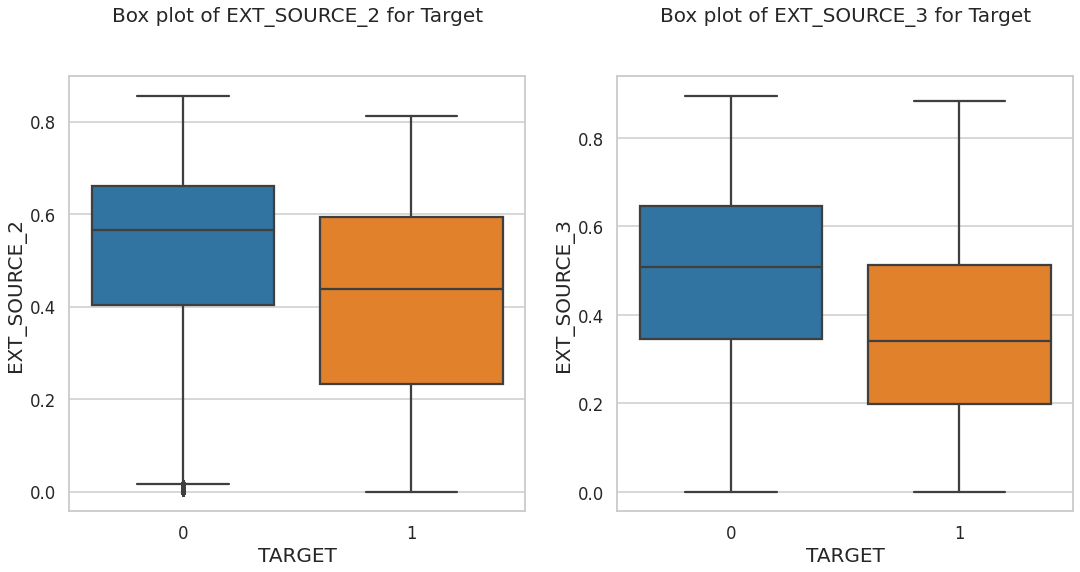

In [173]:
plt.figure(figsize=[18,8])

plt.subplot(1,2,1)
plt.title("Box plot of EXT_SOURCE_2 for Target")
sns.boxplot(data=df,x="TARGET",y="EXT_SOURCE_2")

plt.subplot(1,2,2)
plt.title("Box plot of EXT_SOURCE_3 for Target")
sns.boxplot(data=df,x="TARGET",y="EXT_SOURCE_3")

plt.show()

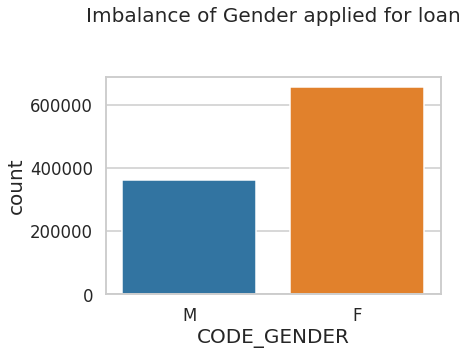

In [174]:
#Code gender column
sns.countplot(data=df, x="CODE_GENDER")
plt.title("Imbalance of Gender applied for loan")
plt.show()

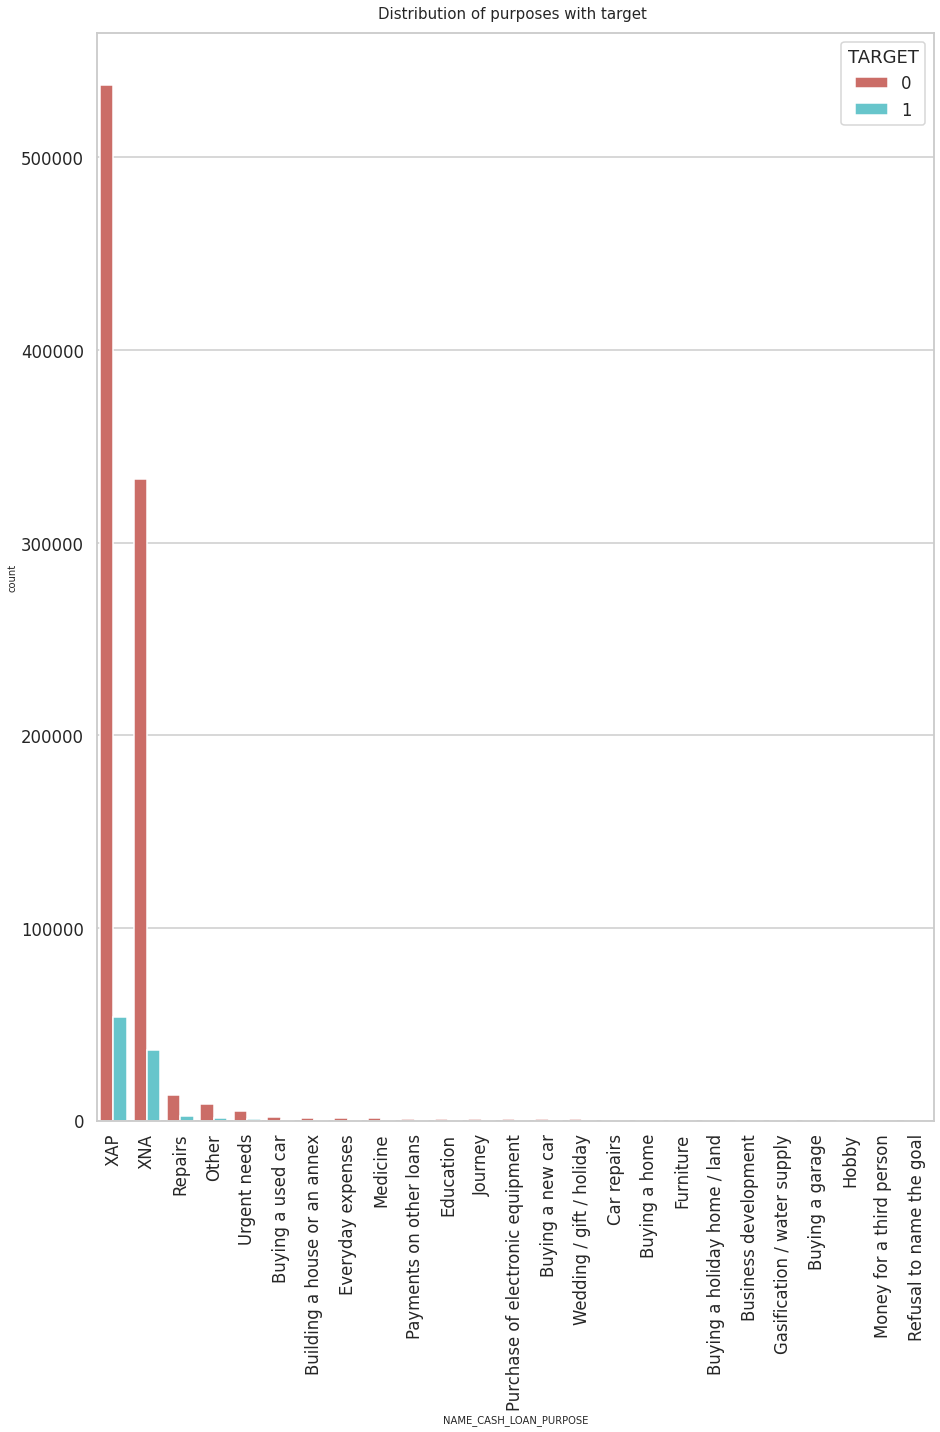

In [176]:
# NAME_CASH_LOAN_PURPOSE Vs TARGET

plt.figure(figsize=(15,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
# plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data = df, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='hls')

plt.show()

In [177]:
df_temp=df[(df["NAME_CASH_LOAN_PURPOSE"]!='XAP')]

In [178]:
df_temp=df_temp[(df_temp["NAME_CASH_LOAN_PURPOSE"]!='XNA')]

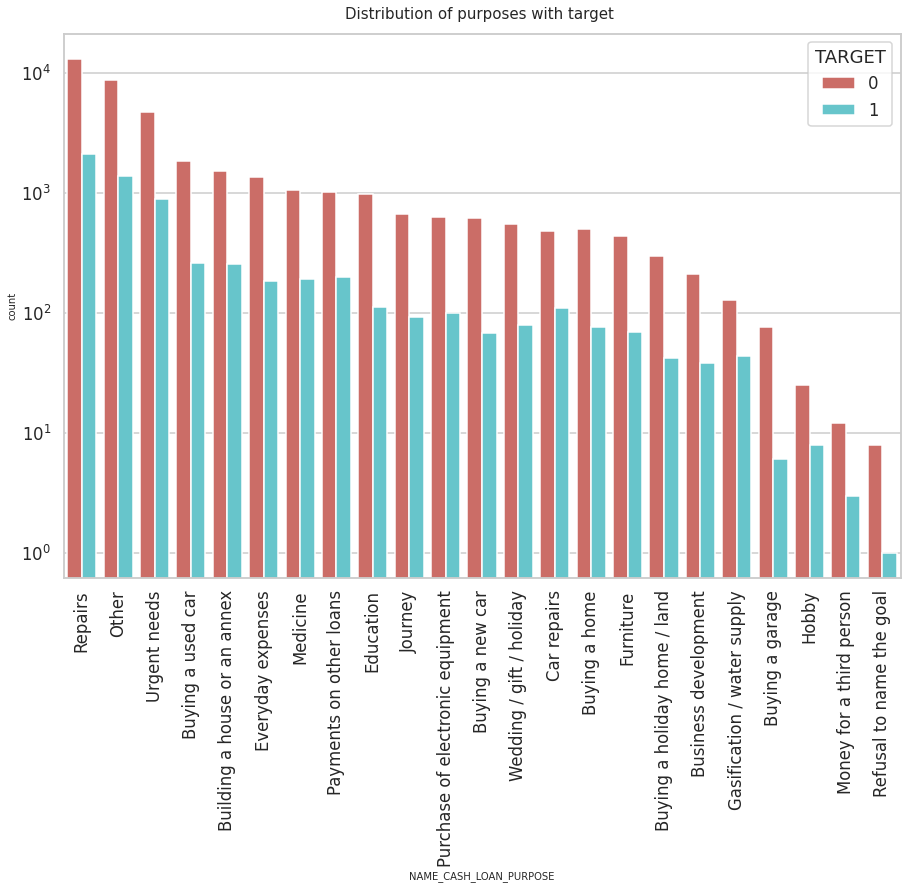

In [179]:
plt.figure(figsize=(15,10))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data = df_temp, x= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_temp['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='hls')

plt.show()

In [180]:
corr_col=['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','DAYS_BIRTH','DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','DAYS_DECISION']

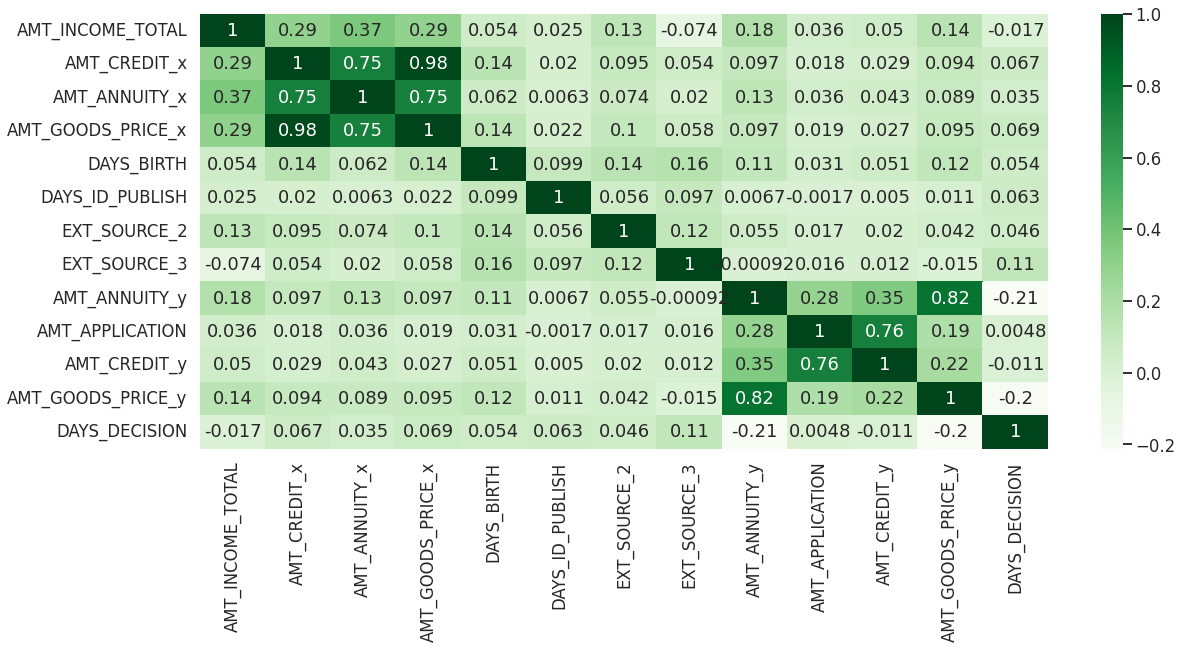

In [184]:
plt.figure(figsize=[19,8])
sns.heatmap(data=df[corr_col].corr(), annot=True, cmap="Greens")
plt.show()

## Segmented analysis

In [185]:
df_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_REALTY  \
1      100003       0           Cash loans           F               N   
2      100003       0           Cash loans           F               N   
3      100003       0           Cash loans           F               N   
4      100004       0      Revolving loans           M               Y   
5      100006       0           Cash loans           F               Y   

   AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x  \
1          270000.0     1293502.5        35698.5          1129500.0   
2          270000.0     1293502.5        35698.5          1129500.0   
3          270000.0     1293502.5        35698.5          1129500.0   
4           67500.0      135000.0         6750.0           135000.0   
5          135000.0      312682.5        29686.5           297000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1          Family    State servant               Higher education   
2          Family    State servant               Higher education   
3          Family    State servant               Higher education   
4   Unaccompanied          Working  Secondary / secondary special   
5   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2               Married  House / apartment                    0.003541   
3               Married  House / apartment                    0.003541   
4  Single / not married  House / apartment                    0.010032   
5        Civil marriage  House / apartment                    0.008019   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  \
1       16765           1188             1186.0              291   
2       16765           1188             1186.0              291   
3       16765           1188             1186.0              291   
4       19046            225             4260.0             2531   
5       19005           3039             9833.0             2437   

  OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1      Core staff                     MONDAY                       11   
2      Core staff                     MONDAY                       11   
3      Core staff                     MONDAY                       11   
4        Laborers                     MONDAY                        9   
5        Laborers                  WEDNESDAY                       17   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   
5                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  \
1                       0                        0                  School   
2                       0                        0                  School   
3                       0                        0                  School   
4                       0                        0              Government   
5                       0                        0  Business Entity Type 3   

   EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  \
1      0.622246           NaN                       1.0   
2      0.622246           NaN                       1.0   
3      0.622246           NaN                       1.0   
4 

## Segmented analysis for categorical variables

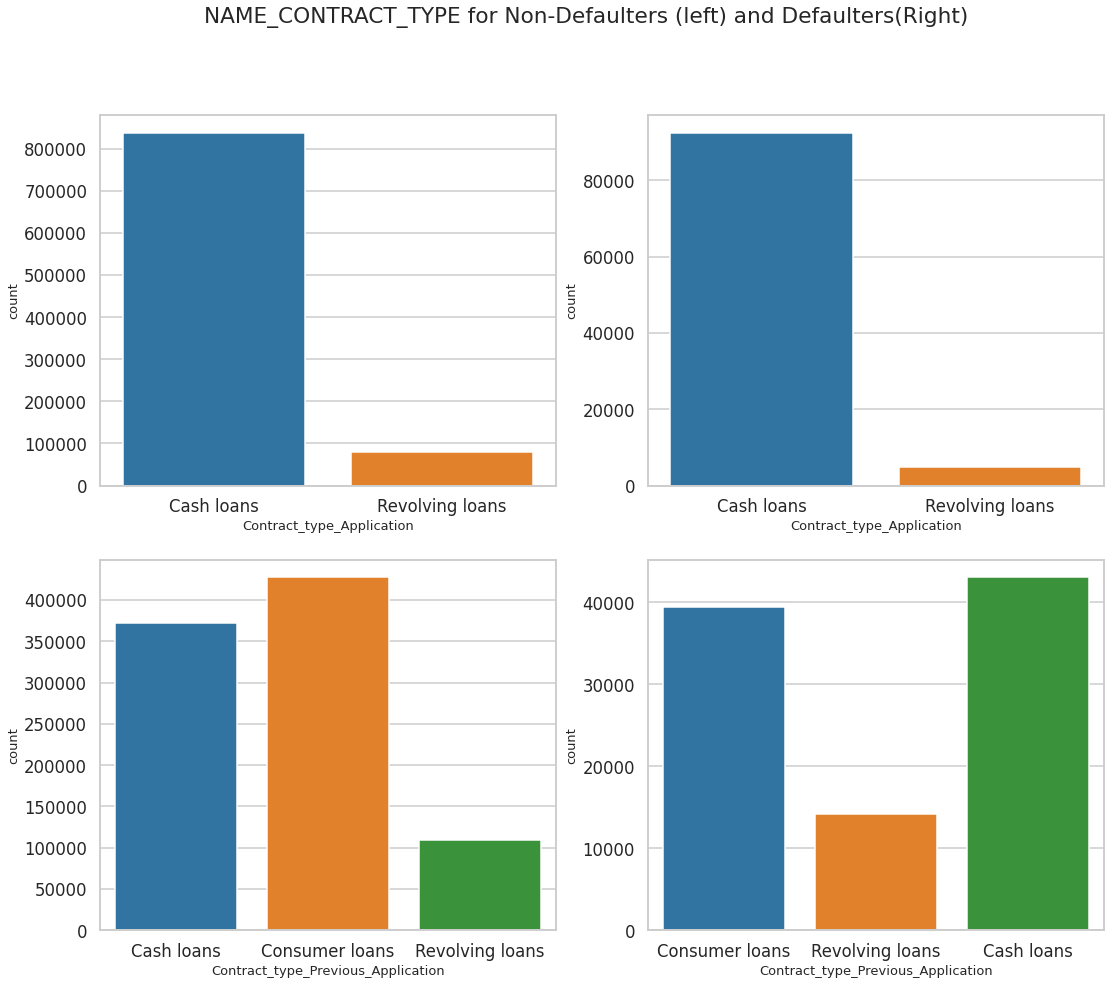

In [186]:
plt.figure(figsize=[18,15])

plt.suptitle("NAME_CONTRACT_TYPE for Non-Defaulters (left) and Defaulters(Right)")

plt.rcParams["axes.labelsize"] = 13

plt.subplot(2,2,1)
sns.countplot(x=df_0["NAME_CONTRACT_TYPE_x"])
plt.xlabel("Contract_type_Application")

plt.subplot(2,2,2)
sns.countplot(x=df_1["NAME_CONTRACT_TYPE_x"])
plt.xlabel("Contract_type_Application")

plt.subplot(2,2,3)
sns.countplot(x=df_0["NAME_CONTRACT_TYPE_y"])
plt.xlabel("Contract_type_Previous_Application")

plt.subplot(2,2,4)
sns.countplot(x=df_1["NAME_CONTRACT_TYPE_y"])
plt.xlabel("Contract_type_Previous_Application")


plt.show()

In [187]:
def seg_count_plot(var):
    plt.figure(figsize=[18,15])

    plt.suptitle(f'{var} for Non-Defaulters (left) and Defaulters(Right)')

    plt.rcParams["axes.labelsize"] = 13

    plt.subplot(2,2,1)
    sns.countplot(x=df_0[var])
    plt.xlabel(f'{var} in Non-defaulter')

    plt.subplot(2,2,2)
    sns.countplot(x=df_1[var])
    plt.xlabel(f"{var} in defaulters")

    plt.show()

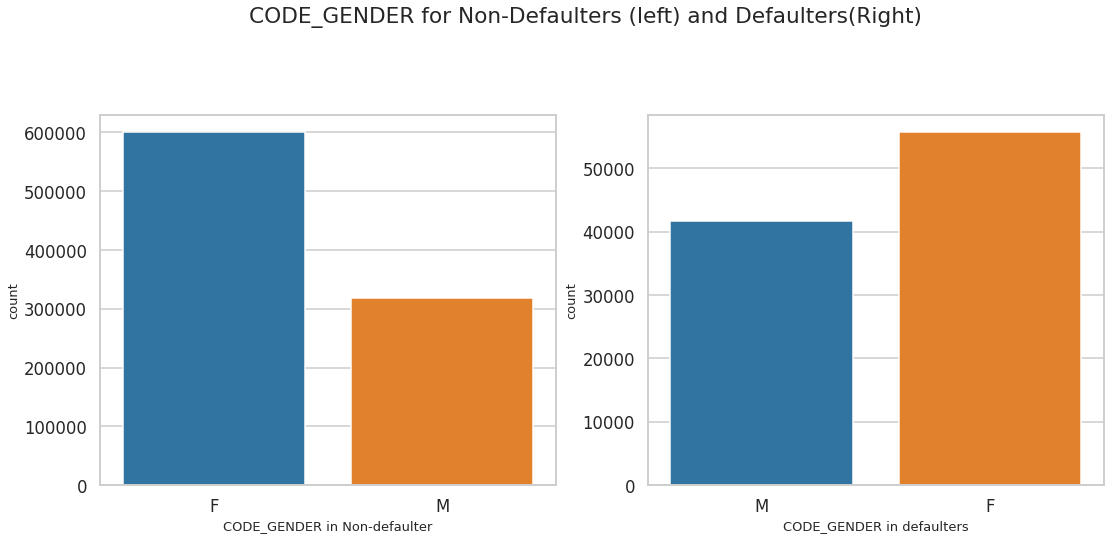

In [188]:
seg_count_plot("CODE_GENDER")

In [189]:
100*df_0["CODE_GENDER"].value_counts()/df_0["CODE_GENDER"].count()

F    65.283163
M    34.716837
Name: CODE_GENDER, dtype: float64

In [190]:
def seg_count_plot_norm(var,rot):
    plt.figure(figsize=[18,10])

    plt.suptitle(f'{var} for Non-Defaulters (left) and Defaulters(Right)')

    plt.rcParams["axes.labelsize"] = 13

    df_norm=pd.DataFrame()
    plt.subplot(2,2,1)
    df_norm['0']=(100*df_0[var].value_counts()/len(df_0))
    df_norm['1']=(100*df_1[var].value_counts()/len(df_1))
    sns.barplot(x=df_norm.index, y=df_norm['0'])
    plt.xlabel(f'{var} in Non-defaulter')
    plt.ylabel(f'% of Non-defaulter')
    plt.xticks(rotation=rot)

    plt.subplot(2,2,2)
    df_1_norm=100*df_1[var].value_counts()/df_1[var].count()
    sns.barplot(x=df_norm.index, y=df_norm['1'])
    plt.xlabel(f"{var} in defaulters")
    plt.ylabel(f'% of Defaulters')
    plt.xticks(rotation=rot)
    
    plt.show()

In [191]:
df_norm=pd.DataFrame()
df_norm['0']=(100*df_0["CODE_GENDER"].value_counts()/len(df_0))
df_norm['1']=(100*df_1["CODE_GENDER"].value_counts()/len(df_1))
df_norm

0         1
F  65.283163  57.18307
M  34.716837  42.81693

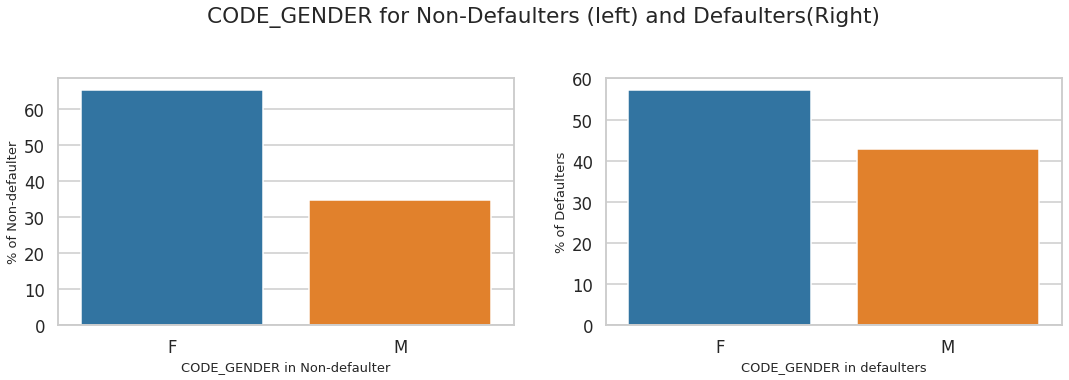

In [192]:
seg_count_plot_norm("CODE_GENDER",0)

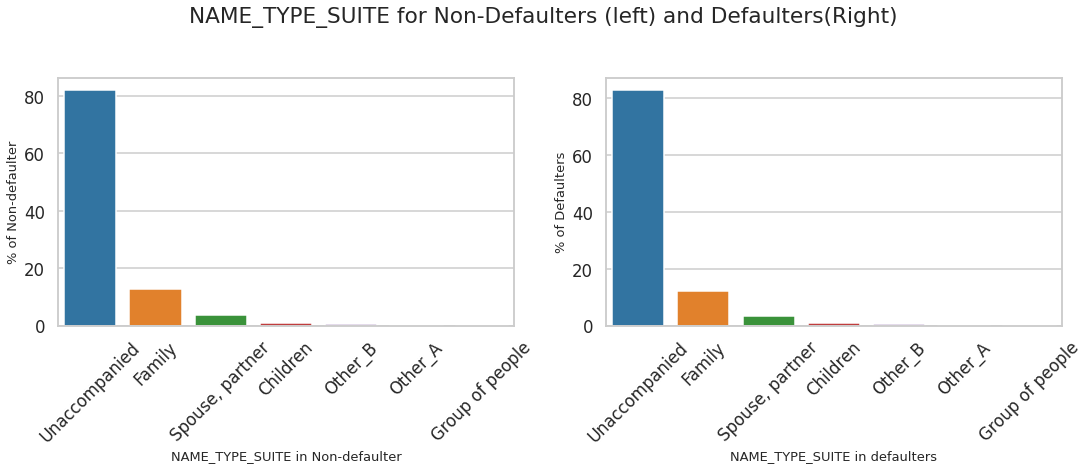

In [194]:
seg_count_plot_norm("NAME_TYPE_SUITE",45)

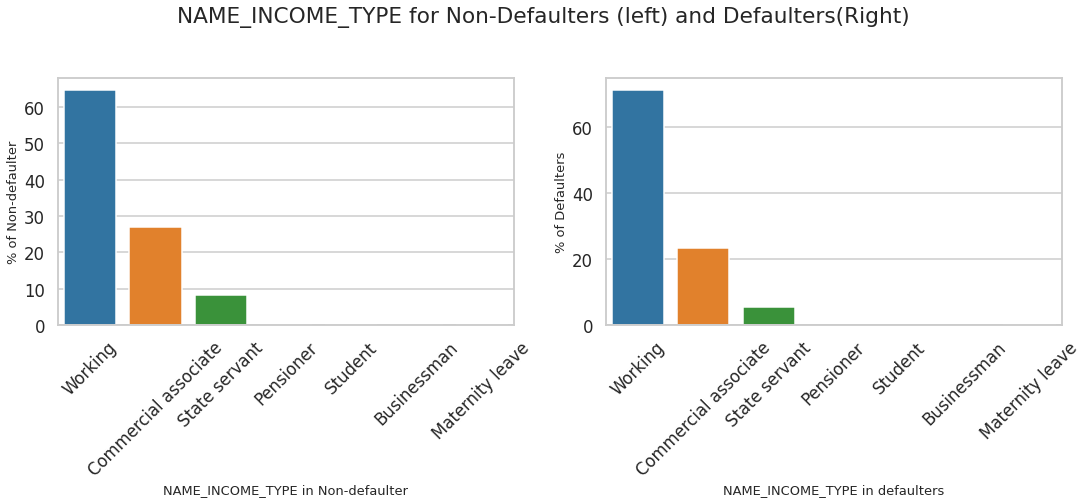

In [195]:
seg_count_plot_norm("NAME_INCOME_TYPE",45)

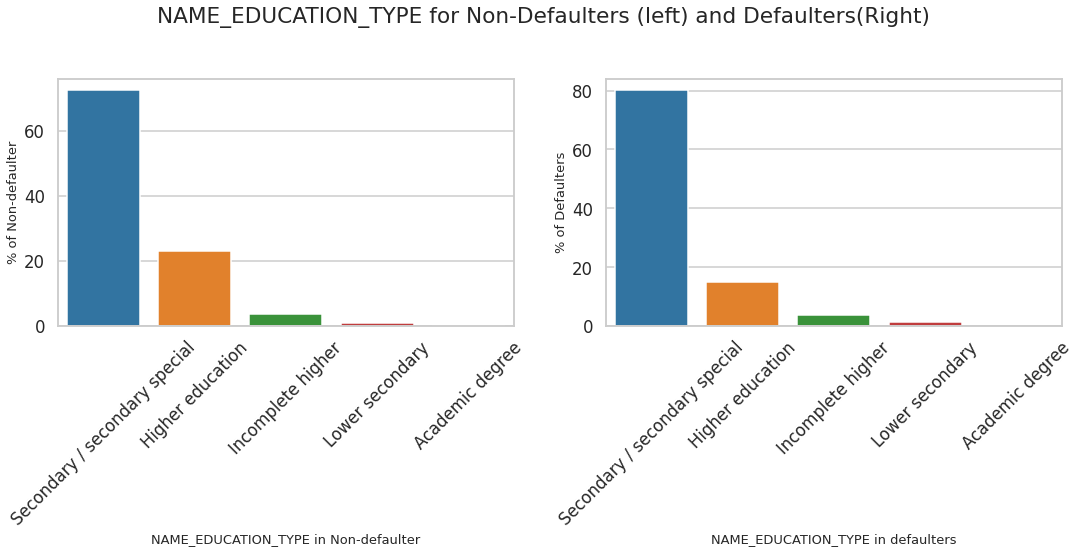

In [196]:
seg_count_plot_norm("NAME_EDUCATION_TYPE",45)

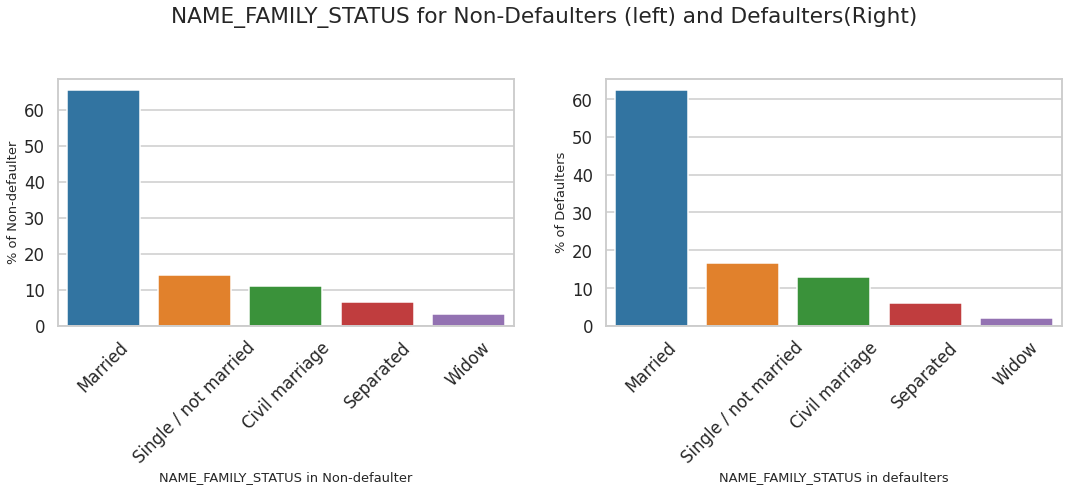

In [197]:
seg_count_plot_norm("NAME_FAMILY_STATUS",45)

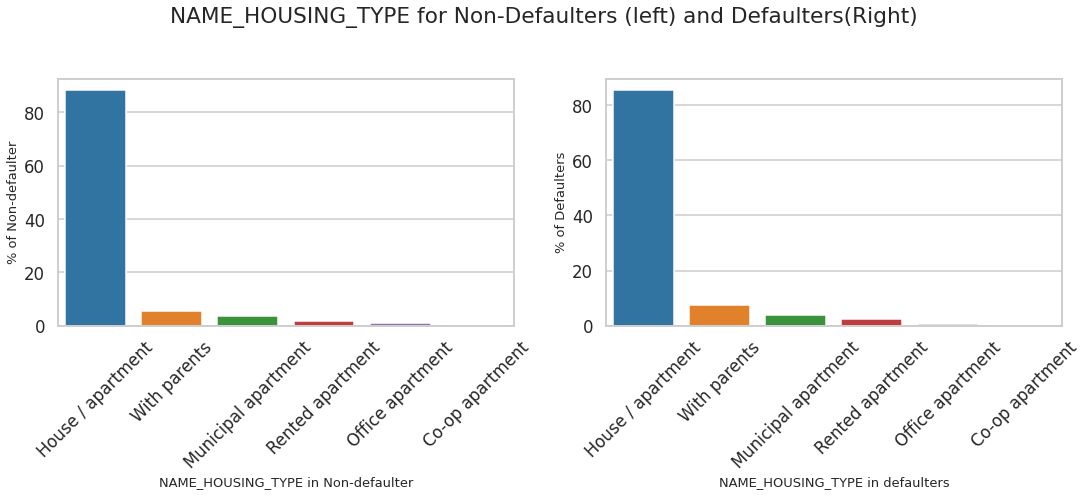

In [198]:
seg_count_plot_norm("NAME_HOUSING_TYPE",45)

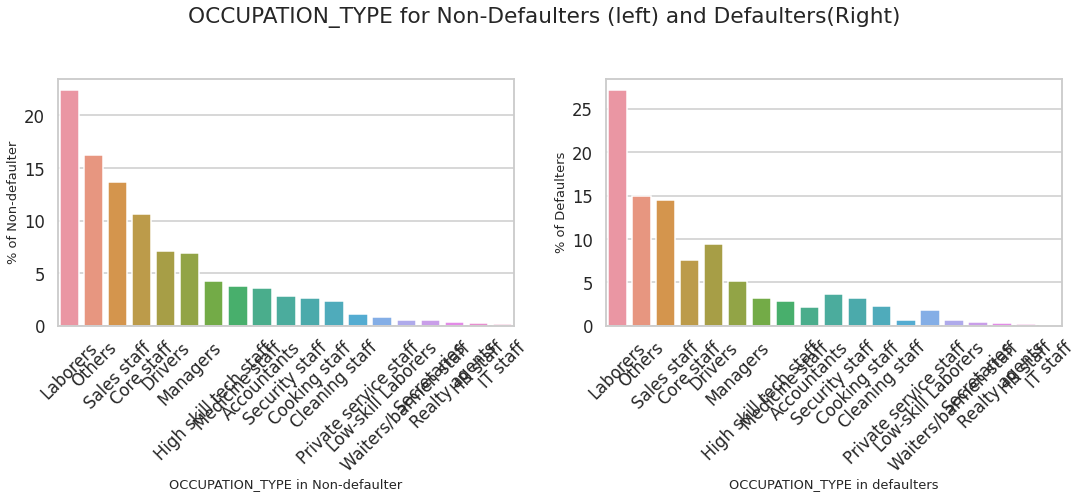

In [199]:
seg_count_plot_norm("OCCUPATION_TYPE",45)

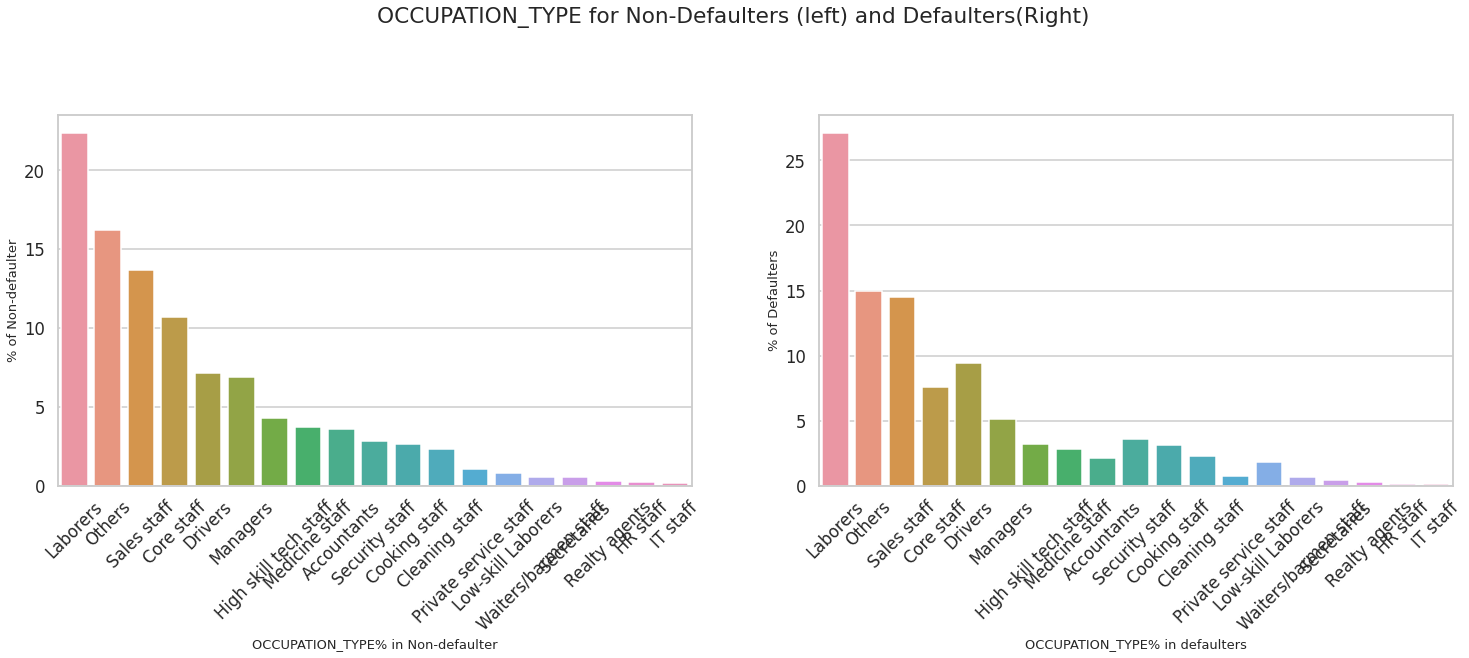

In [200]:
var= "OCCUPATION_TYPE"
plt.figure(figsize=[25,15])

plt.suptitle(f'{var} for Non-Defaulters (left) and Defaulters(Right)')

plt.rcParams["axes.labelsize"] = 13

df_norm=pd.DataFrame()
plt.subplot(2,2,1)
df_norm['0']=(100*df_0[var].value_counts()/len(df_0))
df_norm['1']=(100*df_1[var].value_counts()/len(df_1))
sns.barplot(x=df_norm.index, y=df_norm['0'])
plt.xlabel(f'{var}% in Non-defaulter')
plt.ylabel(f'% of Non-defaulter')
plt.xticks(rotation=45)

plt.subplot(2,2,2)
df_1_norm=100*df_1[var].value_counts()/df_1[var].count()
sns.barplot(x=df_norm.index, y=df_norm['1'])
plt.xlabel(f"{var}% in defaulters")
plt.ylabel(f'% of Defaulters')
plt.xticks(rotation=45)

plt.show()

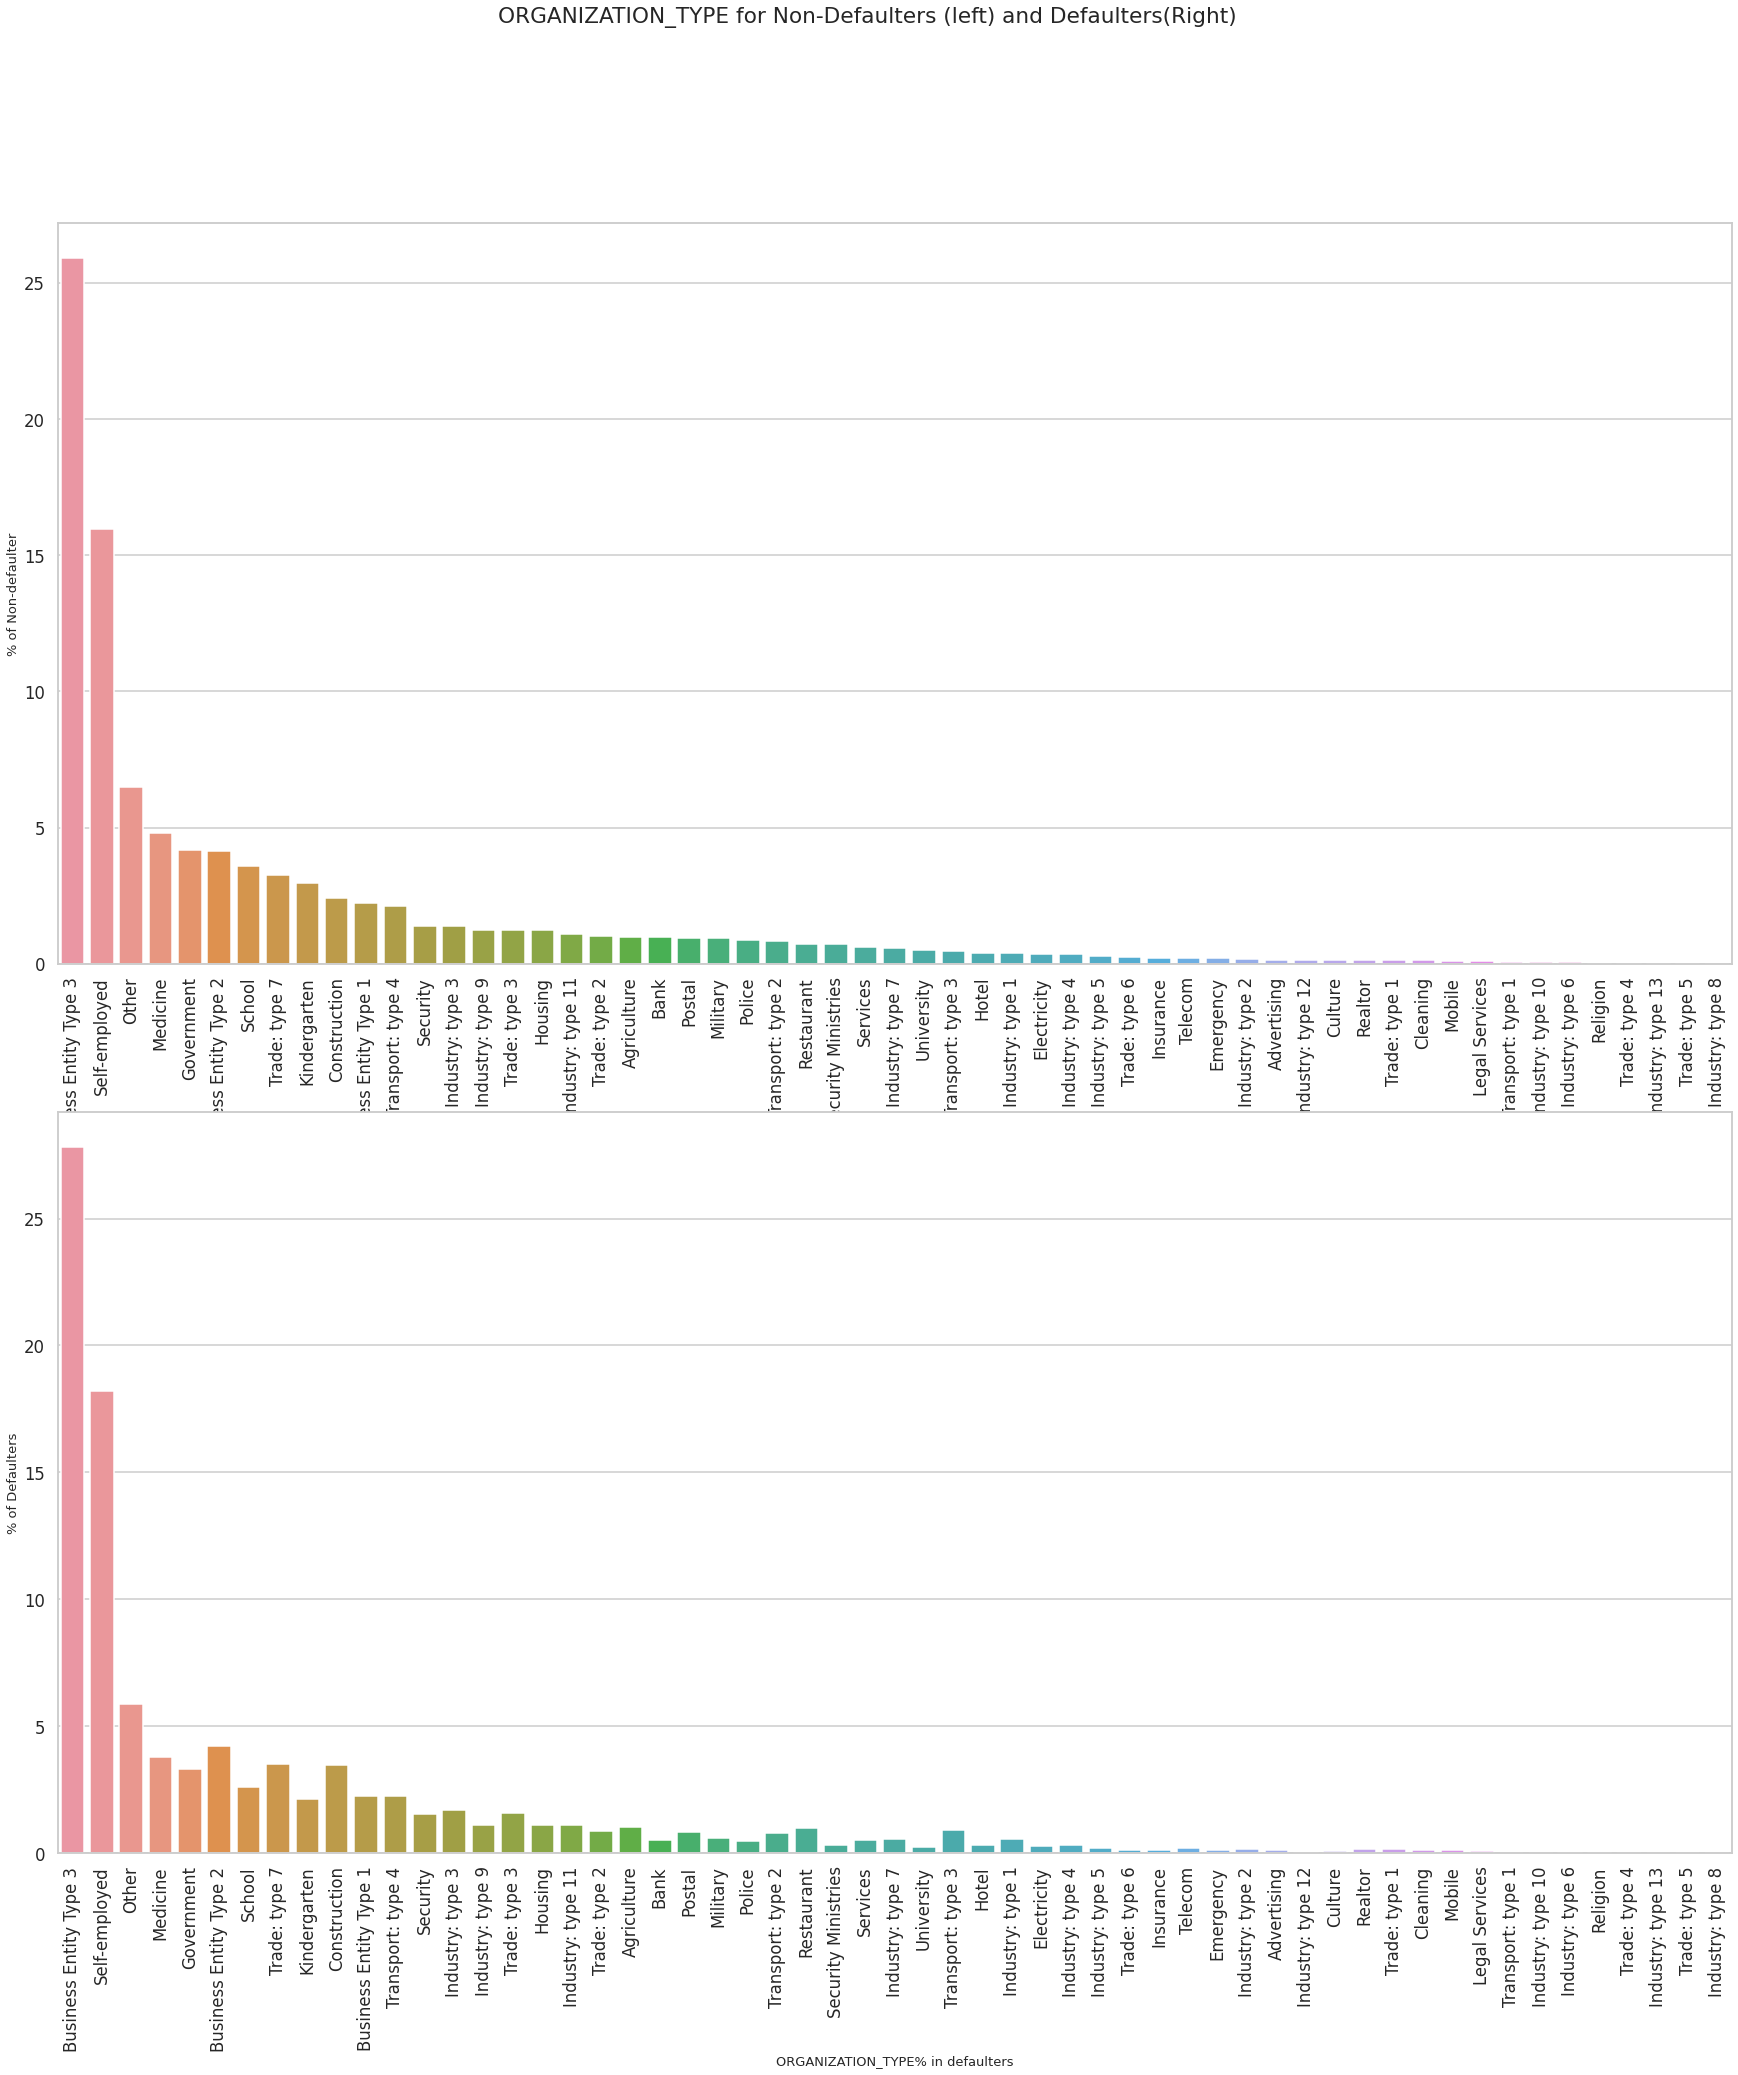

In [203]:
var= "ORGANIZATION_TYPE"
plt.figure(figsize=[30,30])

plt.suptitle(f'{var} for Non-Defaulters (left) and Defaulters(Right)')

plt.rcParams["axes.labelsize"] = 13

df_norm=pd.DataFrame()
plt.subplot(2,1,1)
df_norm['0']=(100*df_0[var].value_counts()/len(df_0))
df_norm['1']=(100*df_1[var].value_counts()/len(df_1))
sns.barplot(x=df_norm.index, y=df_norm['0'])
plt.xlabel(f'{var}% in Non-defaulter')
plt.ylabel(f'% of Non-defaulter')
plt.xticks(rotation=90)


plt.subplot(2,1,2)
df_1_norm=100*df_1[var].value_counts()/df_1[var].count()
sns.barplot(x=df_norm.index, y=df_norm['1'])
plt.xlabel(f"{var}% in defaulters")
plt.ylabel(f'% of Defaulters')
plt.xticks(rotation=90)


plt.show()

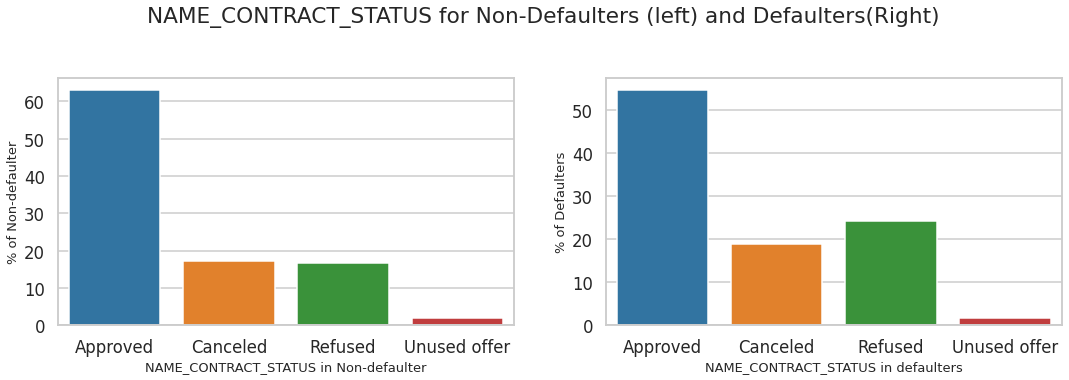

In [204]:
seg_count_plot_norm("NAME_CONTRACT_STATUS",0)

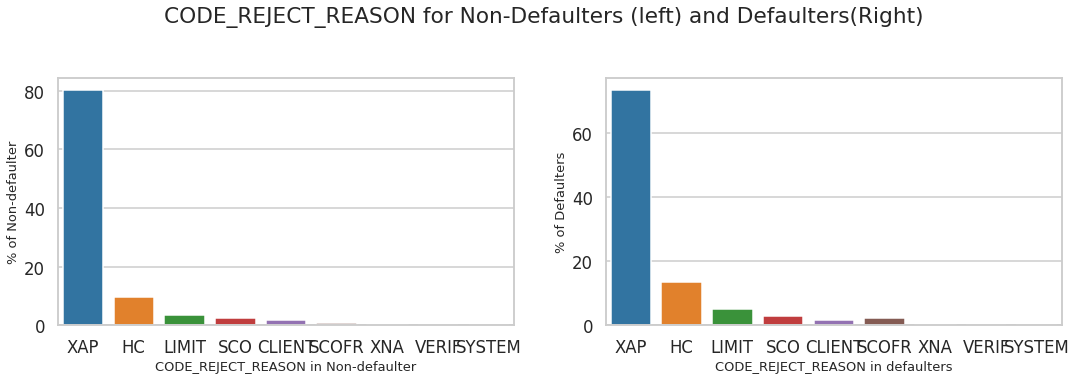

In [205]:
seg_count_plot_norm("CODE_REJECT_REASON",0)

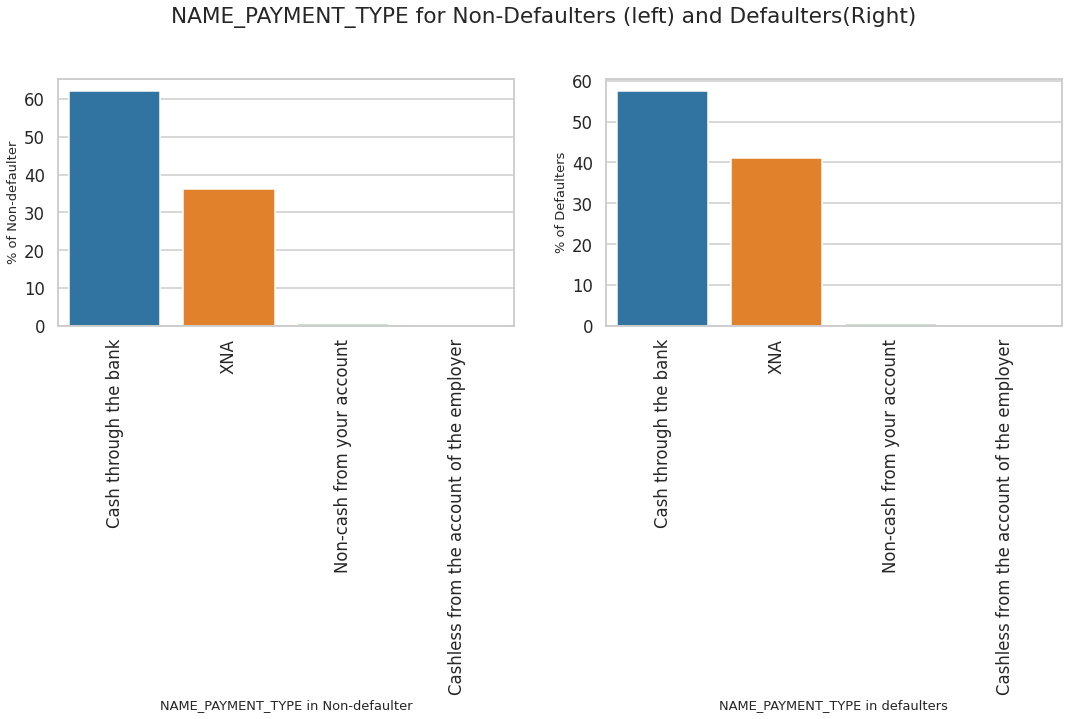

In [206]:
seg_count_plot_norm("NAME_PAYMENT_TYPE",90)

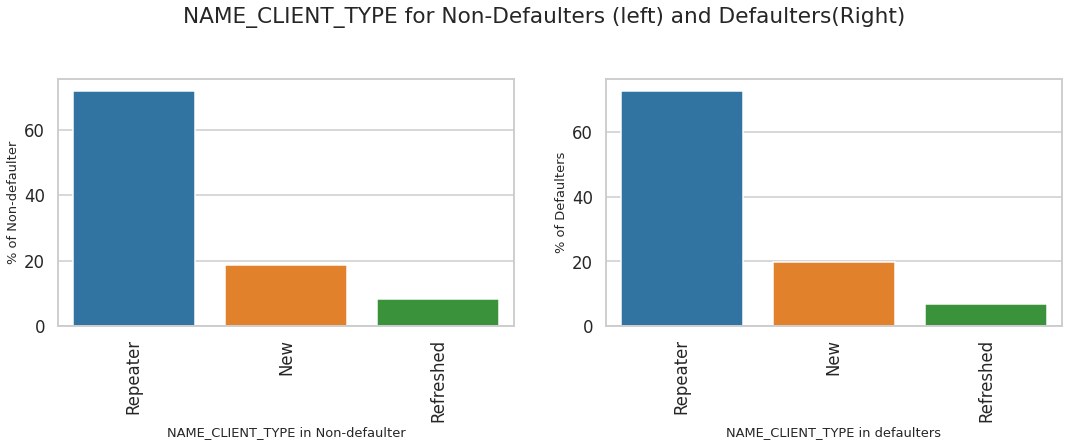

In [207]:
seg_count_plot_norm("NAME_CLIENT_TYPE",90)

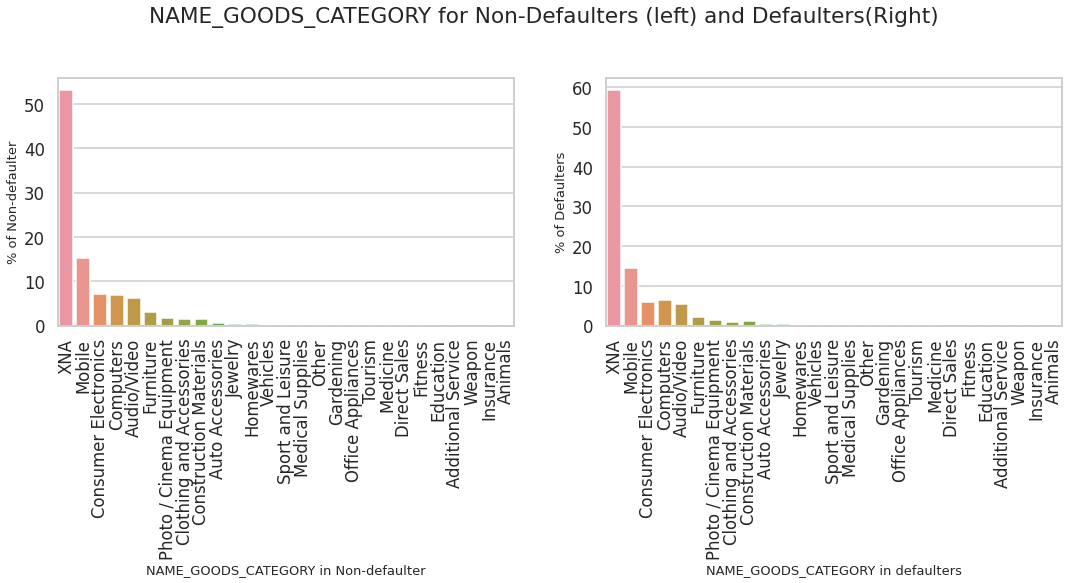

In [208]:
seg_count_plot_norm("NAME_GOODS_CATEGORY",90)

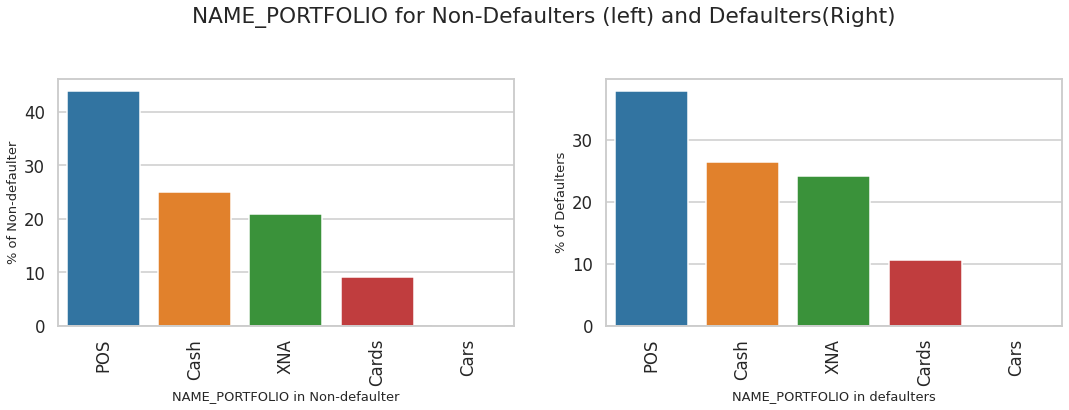

In [209]:
seg_count_plot_norm("NAME_PORTFOLIO",90)

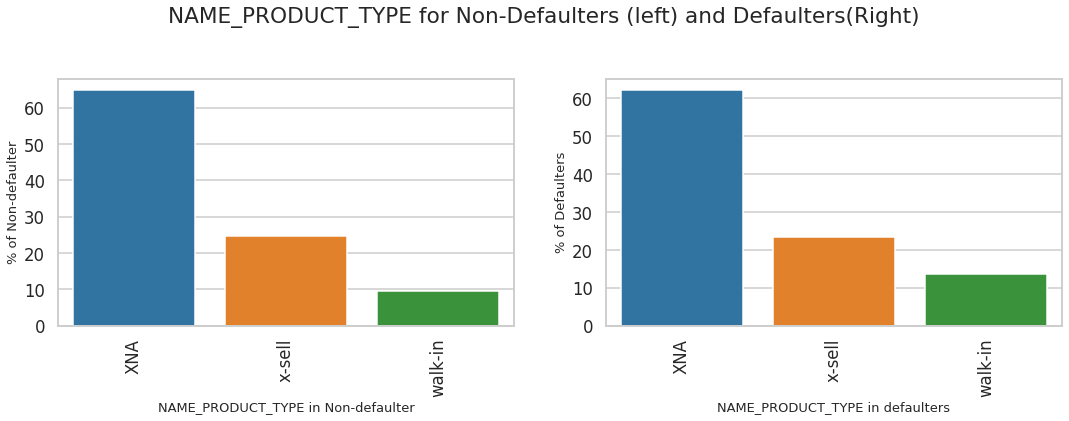

In [210]:
seg_count_plot_norm("NAME_PRODUCT_TYPE",90)

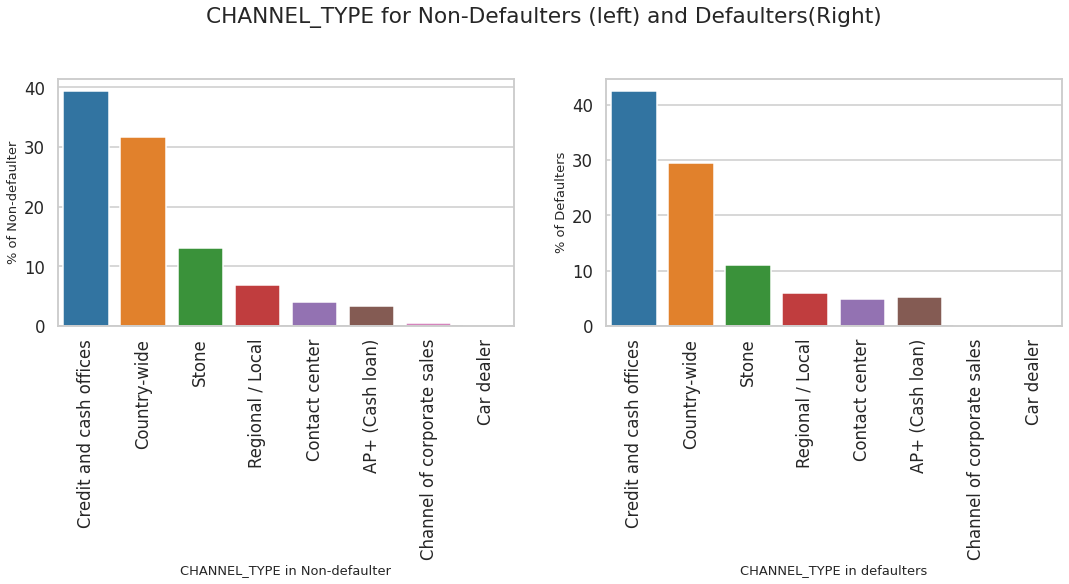

In [211]:
seg_count_plot_norm("CHANNEL_TYPE",90)

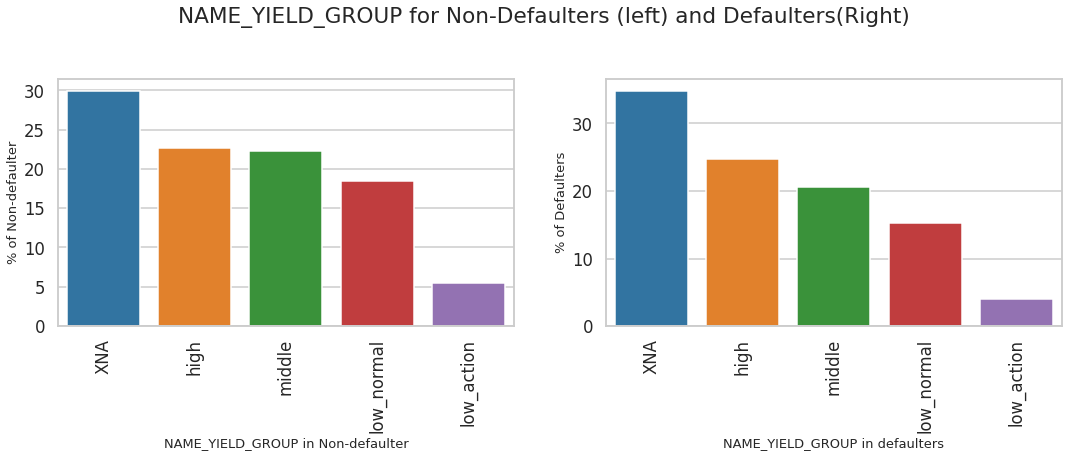

In [212]:
seg_count_plot_norm("NAME_YIELD_GROUP",90)

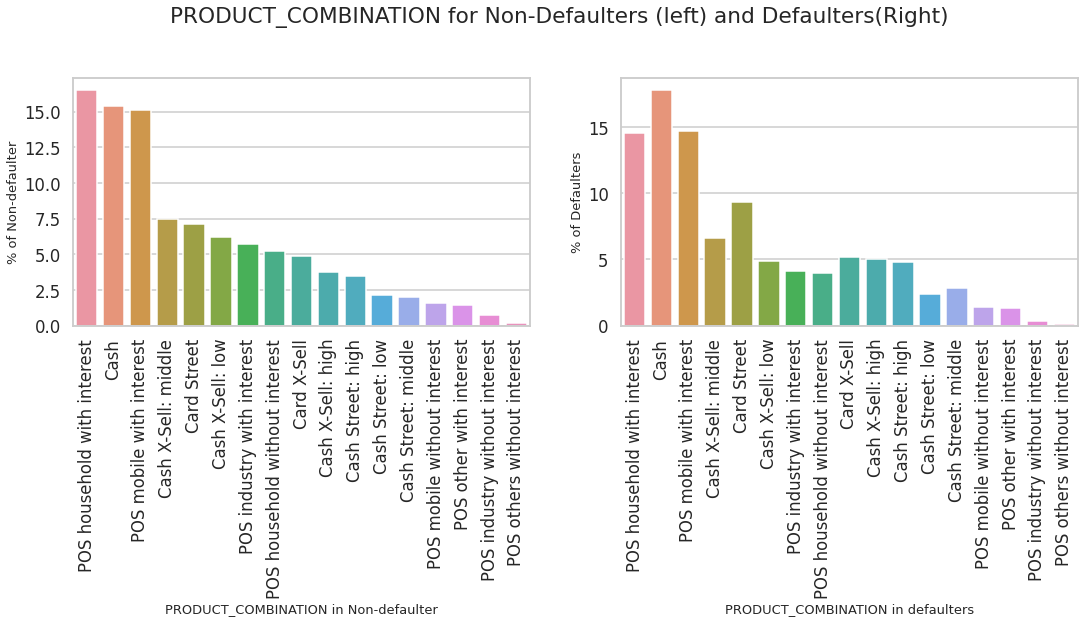

In [213]:
seg_count_plot_norm("PRODUCT_COMBINATION",90)

## Segmented numerical analysis

In [214]:
corr_col=['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','DAYS_BIRTH','DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','DAYS_DECISION']

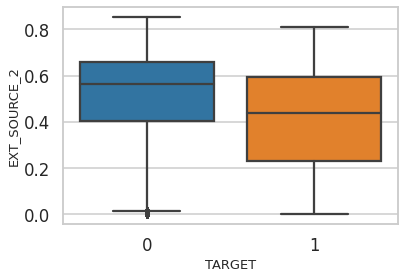

In [215]:
sns.boxplot(data=df,x="TARGET",y="EXT_SOURCE_2")

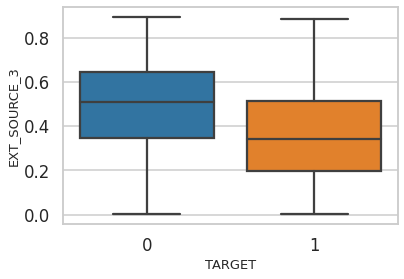

In [216]:
sns.boxplot(data=df,x="TARGET",y="EXT_SOURCE_3")

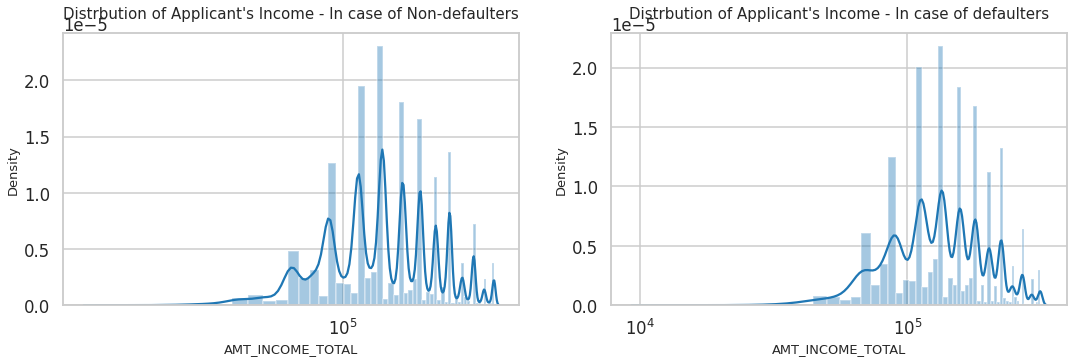

In [217]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
plt.title("Distrbution of Applicant's Income - In case of Non-defaulters")
x=df_0["AMT_INCOME_TOTAL"]
ax=sns.distplot(x)
plt.xscale('log')

plt.subplot(1,2,2)
plt.title("Distrbution of Applicant's Income - In case of defaulters")
x=df_1["AMT_INCOME_TOTAL"]
ax=sns.distplot(x)
plt.xscale('log')

plt.show()

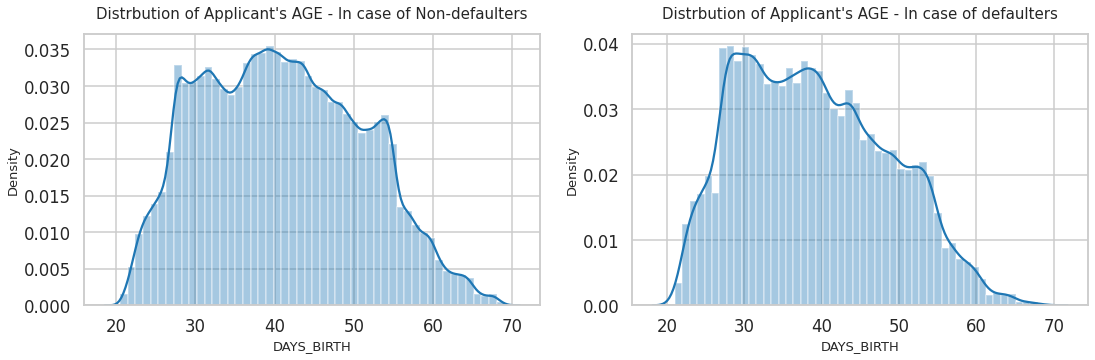

In [218]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
plt.title("Distrbution of Applicant's AGE - In case of Non-defaulters")
x=df_0["DAYS_BIRTH"]/365.24
ax=sns.distplot(x)

plt.subplot(1,2,2)
plt.title("Distrbution of Applicant's AGE - In case of defaulters")
x=df_1["DAYS_BIRTH"]/365.24
ax=sns.distplot(x)

plt.show()

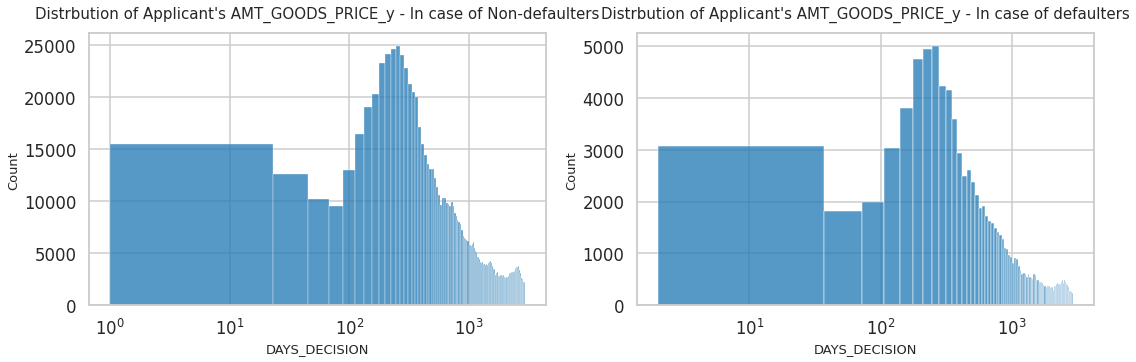

In [219]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
plt.title("Distrbution of Applicant's AMT_GOODS_PRICE_y - In case of Non-defaulters")
x=df_0["DAYS_DECISION"]
ax=sns.histplot(x)
plt.xscale('log')

plt.subplot(1,2,2)
plt.title("Distrbution of Applicant's AMT_GOODS_PRICE_y - In case of defaulters")
x=df_1["DAYS_DECISION"]
ax=sns.histplot(x)
plt.xscale('log')

plt.show()

## BI-Variate analysis

<Figure size 1440x576 with 0 Axes>

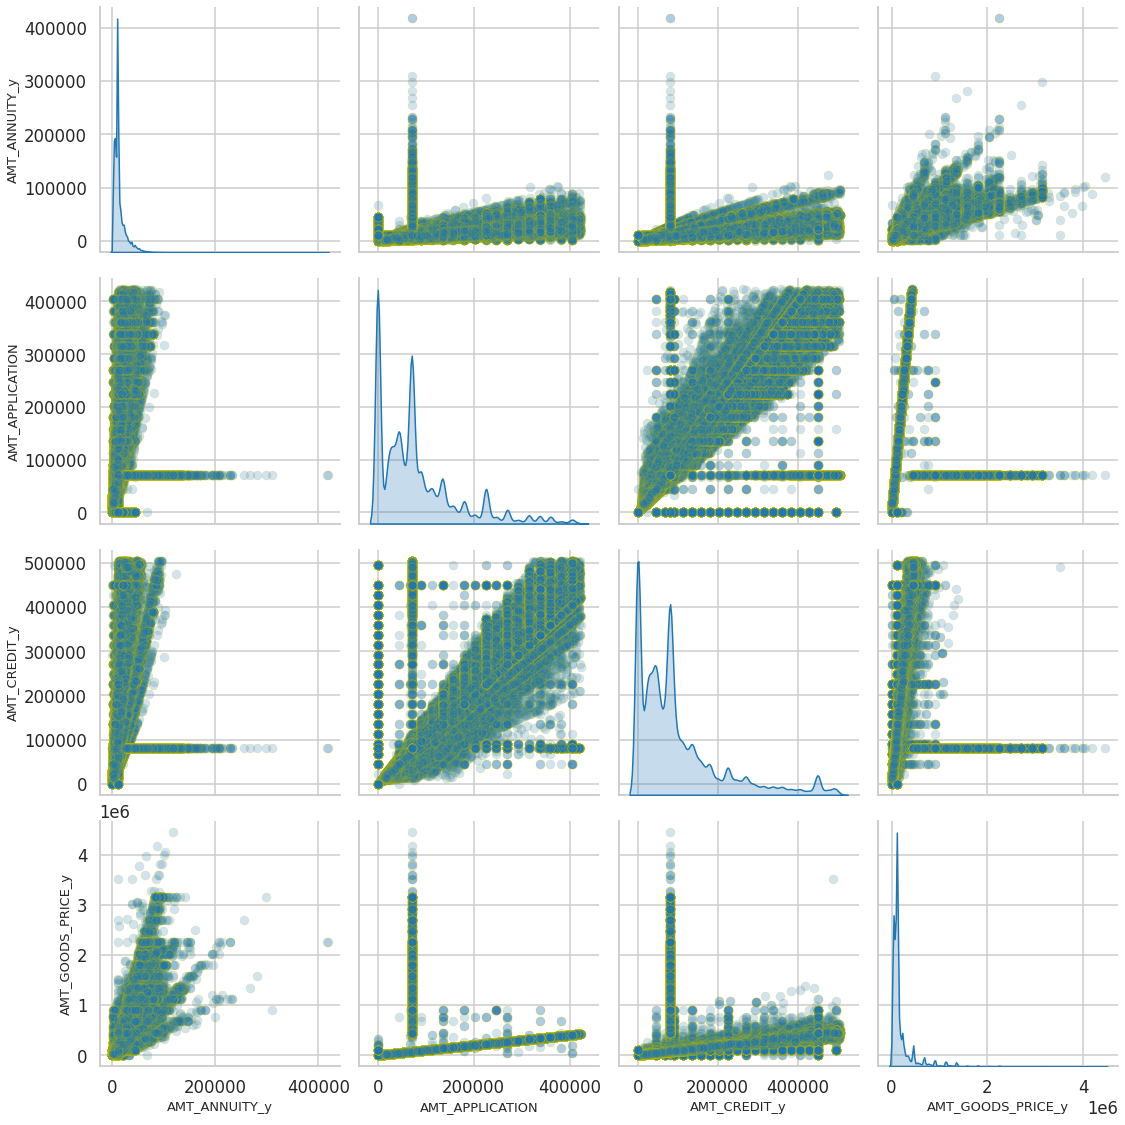

In [220]:
plt.figure(figsize=[20,8])
sns.pairplot(df[['AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y','NAME_CONTRACT_STATUS']], 
             diag_kind = 'kde', 
             plot_kws = {'alpha': 0.2, 's': 80, 'edgecolor': 'y'},
             size = 4)
plt.show()

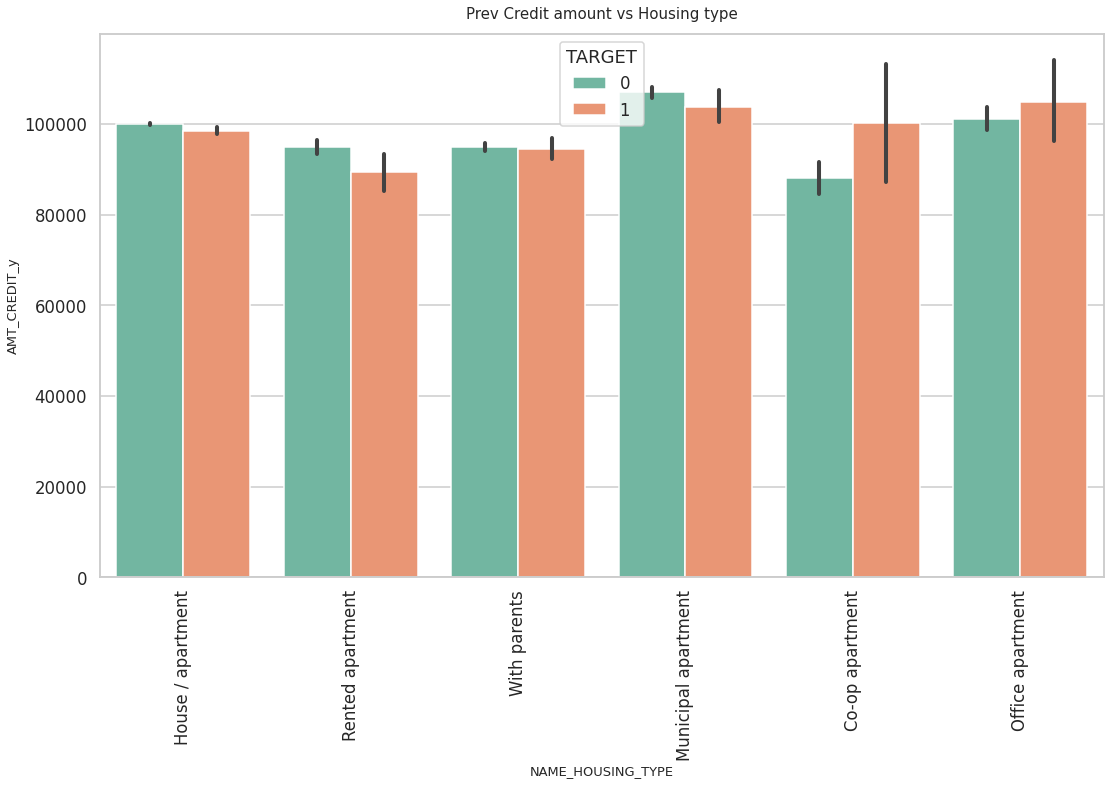

In [221]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
sns.set_palette('Set2')
sns.barplot(data =df, y='AMT_CREDIT_y',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

## Correlation matrix

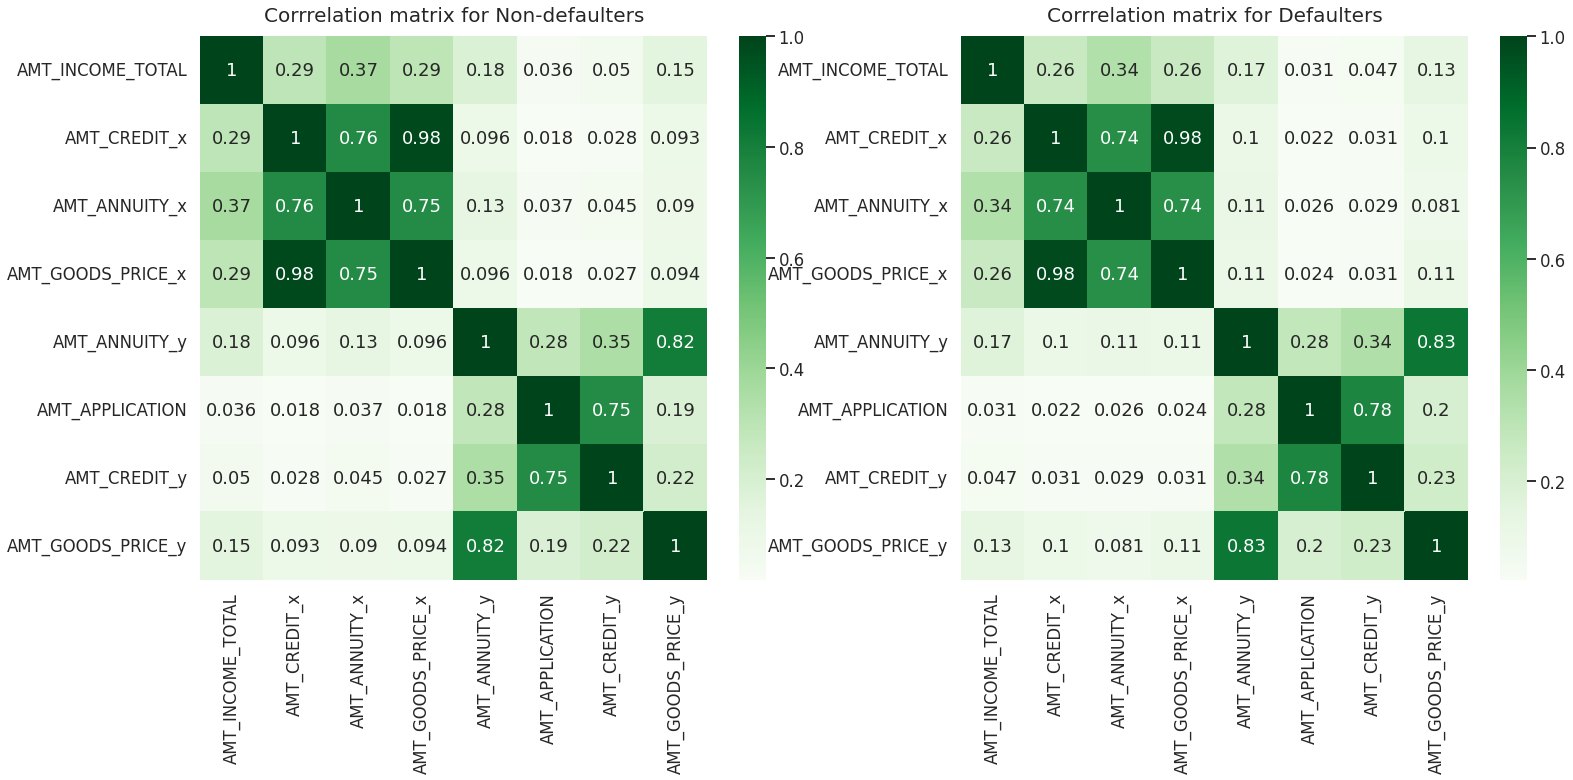

In [222]:
corr_col=['AMT_INCOME_TOTAL','AMT_CREDIT_x','AMT_ANNUITY_x','AMT_GOODS_PRICE_x','AMT_ANNUITY_y','AMT_APPLICATION','AMT_CREDIT_y','AMT_GOODS_PRICE_y']

plt.figure(figsize=[25,10])

plt.rcParams['axes.titlesize'] = 20


plt.subplot(1,2,1)
plt.title("Corrrelation matrix for Non-defaulters")
sns.heatmap(data=df_0[corr_col].corr(), annot=True, cmap="Greens")

plt.subplot(1,2,2)
plt.title("Corrrelation matrix for Defaulters")
sns.heatmap(data=df_1[corr_col].corr(), annot=True, cmap="Greens")

plt.show()

In [223]:
#For df_0 getting the top 10 correlation
corr=df_0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                     Column2  Correlation  \
702     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998561   
158            AMT_GOODS_PRICE_x                AMT_CREDIT_x     0.981296   
447  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.872361   
734     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.866511   
543      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.823438   
893            AMT_GOODS_PRICE_y               AMT_ANNUITY_y     0.815299   
127                AMT_ANNUITY_x                AMT_CREDIT_x     0.755127   
863                 AMT_CREDIT_y             AMT_APPLICATION     0.752187   
159            AMT_GOODS_PRICE_x               AMT_ANNUITY_x     0.750957   
415   REG_REGION_NOT_WORK_REGION  REG_REGION_NOT_LIVE_REGION     0.449662   

     Abs_Correlation  
702         0.998561  
158         0.981296  
447         0.872361  
734         0.866511  
543         0.823438  
893         0.815299  
127         0.755127  
863         0.752187  
159         0.750957  
415         0.449662

In [224]:
#For df_1 Getting the top 10 correlation
corr=df_1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Column1','Column2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

Column1                     Column2  Correlation  \
702     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE     0.998340   
158            AMT_GOODS_PRICE_x                AMT_CREDIT_x     0.977443   
447  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION     0.868268   
734     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE     0.853212   
893            AMT_GOODS_PRICE_y               AMT_ANNUITY_y     0.832401   
863                 AMT_CREDIT_y             AMT_APPLICATION     0.781250   
543      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY     0.778091   
127                AMT_ANNUITY_x                AMT_CREDIT_x     0.743089   
159            AMT_GOODS_PRICE_x               AMT_ANNUITY_x     0.736650   
511       REG_CITY_NOT_WORK_CITY      REG_CITY_NOT_LIVE_CITY     0.476677   

     Abs_Correlation  
702         0.998340  
158         0.977443  
447         0.868268  
734         0.853212  
893         0.832401  
863         0.781250  
543         0.778091  
127         0.743089  
159         0.736650  
511         0.476677

# Observation from Heat Map
- AMT CREDIT is closely associated with AMT GOODS PRICE. i.e. the loan credit amount is proportional to the price of the goods for which the loan is sought.
- AMT CREDIT and AMT ANNUITY have a strong relationship. (The loan annuity and the loan credit amount are exactly proportionate.)
- AMT GOODS PRICE and AMT ANNUITY have a strong relationship.

# Observation from correlation matrix
- With the Categorical columns removed, we can see that the variables below are substantially connected for Non-defaulters.
1. AMT_ANNUITY_x  & AMT_CREDIT_x
2. AMT_GOODS_PRICE_y & AMT_ANNUITY_y
3. AMT_GOODS_PRICE_x & AMT_CREDIT_x




#Conclusions

- Banks should consider lending to those who have a high credit score from external scoring firms.
- Loan requests for the intention of'repairs' are having more trouble making timely payments.
- The percentage of defaulters among "labourers" and "drivers" is much higher. And "sales personnel," "core staff," "security staff," "kitchen staff," "cleaning staff," and "private sector workers" are all moderately high.
- Because there are many defaulters with this combination, the bank should scrutinise their application when giving loans to persons living in co-op flats in Region 3.
- In the case of pensioners, the percentage of defaulters is much lower, and in the case of state employees, it is moderately lower. Before authorising the loan, other categories must be thoroughly examined.
- Clients with a lower secondary education are the most likely to fail when their previous loans are revoked or refused.